# Project Name and ID: Texas Employee Salary Prediction ( PRCP-1024-TexasSalaryPrediction )

## Team Id: PTID-CDS-DEC-24-2258

### Project Type : Regression

#### Contribution: Anjali Kumbhar and Aarti Salunkhe

## Project Summary

This project focuses on building a predictive model using machine learning techniques to estimate the payroll information of employees in the Texas State Government. The predictive model will take various employee-related attributes as input and output a salary prediction.

The key factors influencing Texas employee salary predictions include job title (Class Title), hourly rate as these directly impact compensation. Employment status (full-time vs part-time) and agency name also play significant roles in determining salary. Location (State Number) affects wages due to regional pay differences, especially between urban and rural areas. While gender and ethnicity may influence salary disparities, they are typically considered in analysis to address pay equity issues.

# Problem Statement:

The Texas State Government wants to develop a predictive model to forecast payroll information (e.g., salaries) for its employees based on various factors such as job titles, department, employment status, experience, location, and other employee-related information. The goal is to help the government team better understand salary distributions, optimize budgeting, and ensure equity in pay across various departments and employee categories. By predicting salaries accurately, the government can plan more efficiently for compensation, benefits, and budgeting.

### Importing All Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### Loading the Dataset

In [3]:
data=pd.read_csv('salary.csv')

In [4]:
data

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  ... HRLY RATE  HRS PER WK  \
0       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
1       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04454         4.0   
2       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
3       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04453         4.0   
4       CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
...                                          ...  ...       ...         ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149477  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149478  CRP - CLASSIFIED REGULAR PART-TIME        ...  12.93000        20.0   
149479  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000       

from above dataset we can clearly see that employee salary depends on hrs rate,Hrs per week and Monthly (Monthly income) this dataset contains 149481 rows and 20 independent columns and 1 target columns

# Basic Checks

### Checking first five rows 

In [4]:
data.head()

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3     212  OFFICE OF COURT ADMINISTRATION                ...   
4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

   ... HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  duplicated  \
0  ...  75.96150        29.0  9545.82  114549.84        127717        True   
1  ...  81.04454         4.0  1404.77   16857.24        127717        True   
2  ...  75.96150        29.0  9545.82  114549.84         59115        True   
3  ...  81.04453         4.0  1404.77   16857.24         59115        True   
4  ...   0.00000        40.0  3284.27   39411.24        165030        True   

  multiple_full_time_jobs  combined_multiple_jobs summed_annual_salary  \
0                     NaN                     NaN            131407.08   
1                     NaN                     NaN                  NaN   
2                     NaN                     NaN            131407.08   
3                     NaN                     NaN                  NaN   
4                     1.0                     NaN                  NaN   

   hide_from_search  
0               NaN  
1              True  
2               NaN  
3              True  
4               NaN  

[5 rows x 21 columns]

### Checking last five rows of datasets

In [5]:
data.tail()

AGENCY                                        AGENCY NAME  \
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  ... HRLY RATE  HRS PER WK  \
149476  CRF - CLASSIFIED REGULAR FULL-TIME        ...      0.00        40.0   
149477  CRF - CLASSIFIED REGULAR FULL-TIME        ...      0.00        40.0   
149478  CRP - CLASSIFIED REGULAR PART-TIME        ...     12.93        20.0   
149479  CRF - CLASSIFIED REGULAR FULL-TIME        ...      0.00        40.0   
149480  CRP - CLASSIFIED REGULAR PART-TIME        ...     11.74        20.0   

        MONTHLY    ANNUAL  STATE NUMBER  duplicated multiple_full_time_jobs  \
149476  2899.00  34788.00        770781         NaN                     NaN   
149477  5500.00  66000.00        847431         NaN                     NaN   
149478  1120.60  13447.20         34266         NaN                     NaN   
149479  5744.16  68929.92        123490         NaN                     NaN   
149480  1017.46  12209.52        103583         NaN                     NaN   

        combined_multiple_jobs summed_annual_salary  hide_from_search  
149476                     NaN                  NaN               NaN  
149477                     NaN                  NaN               NaN  
149478                     NaN                  NaN               NaN  
149479                     NaN                  NaN               NaN  
149480                     NaN                  NaN               NaN  

[5 rows x 21 columns]

### Checking all the Columns

In [5]:
pd.set_option('display.max_columns',None)
data

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS EMPLOY DATE  HRLY RATE  \
0       URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   75.96150   
1       CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   81.04454   
2       URP - UNCLASSIFIED REGULAR PART-TIME        02/01/20   75.96150   
3       CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   81.04453   
4       CRF - CLASSIFIED REGULAR FULL-TIME          06/29/20    0.00000   
...                                          ...         ...        ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME          10/30/17    0.00000   
149477  CRF - CLASSIFIED REGULAR FULL-TIME          07/13/15    0.00000   
149478  CRP - CLASSIFIED REGULAR PART-TIME          10/15/12   12.93000   
149479  CRF - CLASSIFIED REGULAR FULL-TIME          09/22/89    0.00000   
149480  CRP - CLASSIFIED REGULAR PA

## Domain Analysis

- 1.AGENCY: A business or organization providing a particular serivice on behalf of another business,person,or group.
- 2.AGENCY NAME: A person or thing through which power is used or something is achieved in this dataset Agency names are given
- 3.LAST NAME: It is the last name of indivisual/employee record.
- 4.FIRST NAME: It is the first name of indivisual/employee record.
- 5.MI: Middle intial is given 
- 6.CLASS CODE: These codes must be establised before employees can be added to the system and payrolls processed.
- 7.CLASS TITLE: The official title used for all personnel and payroll processes.
- 8.ETHNICITY: The quality or fact of belonging to a population group or subgroup made up of people. Here Ethnicity has 6 unique categories White,HISPANIC,BLACK,  ASIAN, OTHER,AM INDIAN,etc. 
- 9.GENDER: 
Is the range of characteristicsRelated to being female or male and recognizing the differences between them.h
- 10.STATUS : Position or rank in relation to others.
- 11.EMPLOYEE DATE : Date of joining of an individua/employeel.
- 12..HRLY RATE : The amount of money that is charged, paid, or earned for every hour worked.
- 13.HRS PER WEEK : The number of hours in a week that the employee normally would work for the shared work employer or 40 hours.
- 14.MONTHLY : A salary is the money that someone is paid each month by their employer.
- 15.ANNUAL : An annual salary is the total amount of money you earn from a job in a year.
- 16.STATE NUMBER : A unique number assigned to a business or organization by the state where the business operates, and is used for filing taxes and hiring employees.
- 17.DUPLICATED : One of two or more identical things.
- 18.MUTIPLE FULL TIME JOBS : Individuals works on one or more jobs in full time.
- 19.COMBINED MULTIPLE JOBS : The Combine Jobs feature allows you to merge two or more jobs from the same market view into a single job.
- 20.SUMMED ANNUAL SALARY : Total salary earned by an individual in a year including mutiple full time jobs and combined multiple jobs.
- 21.HIDE FROM SEARCH : Gives you the option for your web searches to be hidden with respect to organisatio.


### Checking Size and Shape

In [7]:
print(f" Shape of Data {data.shape}")
print(f" Size of Data {data.size}")

 Shape of Data (149481, 21)
 Size of Data 3139101


### Checking info 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

- Here we can see that no null values are present
- there are total 149481 entries or rows 0 to 149480
- total 21 columns
- 6 features are of float dtypes ,13 object and 2 columns are integers
- very few values in duplicated,multiple_Full time_jobs,combinedP_multiple_jobsand summed_annual_Salary.
- most variables are upper case which should be converted to lower case.

### Checking All the columns Names

In [9]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

### Checking data curruption

In [10]:
data.head(2)

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       

  EMPLOY DATE  HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  \
0    02/18/88   75.96150        29.0  9545.82  114549.84        127717   
1    02/01/15   81.04454         4.0  1404.77   16857.24        127717   

  duplicated  multiple_full_time_jobs combined_multiple_jobs  \
0       True                      NaN                    NaN   
1       True                      NaN                    NaN   

   summed_annual_salary hide_from_search  
0             131407.08              NaN  
1                   NaN             True

In [11]:
data.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

here employee data is in object dtype we have to convert them into datetime

### Checking for missing values

In [12]:
data.isna().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

- There is not missing values
- duplicated,multiple_full_time_jobs,summd_annual_salary,hide_from_search,combined_multiple_jobs has null value count high these columns are not required for us so we ignored these column

### Checking for statistical information

In [13]:
data.describe()

AGENCY      HRLY RATE     HRS PER WK        MONTHLY  \
count  149481.000000  149481.000000  149481.000000  149481.000000   
mean      545.736288       0.346488      39.714918    4226.184248   
std       139.057691       4.211485       2.323855    2093.111691   
min       101.000000       0.000000       1.000000      50.000000   
25%       529.000000       0.000000      40.000000    3019.840000   
50%       530.000000       0.000000      40.000000    3720.170000   
75%       696.000000       0.000000      40.000000    4865.810000   
max       930.000000     117.788480      70.000000   46125.000000   

              ANNUAL  STATE NUMBER  multiple_full_time_jobs  \
count  149481.000000  1.494810e+05                     14.0   
mean    50714.210973  5.651930e+05                      1.0   
std     25117.340292  4.786212e+05                      0.0   
min       600.000000  1.000000e+00                      1.0   
25%     36238.080000  1.133340e+05                      1.0   
50%     44642.040000  3.463730e+05                      1.0   
75%     58389.720000  1.100500e+06                      1.0   
max    553500.000000  1.271604e+06                      1.0   

       summed_annual_salary  
count             16.000000  
mean           74303.955000  
std            51925.944282  
min            18000.000000  
25%            32962.500000  
50%            48063.300000  
75%           123751.770000  
max           171383.400000

## Insights:
- Here total count is 149481.00000
- outliers may be present in monthly and annual columns
- dataset shows large variation in salary
- hourly rates of dollar 0 and monthly salries as low as $ 50,which may indicate missinfo or False data.
- hrly Rate ,Annual and Monthly columns exibits high standard deviations.
- Multiple full time jobs is having zero standard deviation hence it is a constant feature so it cannot affect target variable

### Statistical information of Object Columns

In [14]:
data.describe(include='O')

AGENCY NAME  \
count                                              149481   
unique                                                113   
top     HEALTH AND HUMAN SERVICES COMMISSION          ...   
freq                                                36667   

                             LAST NAME                      FIRST NAME  \
count                           149481                          149481   
unique                           38675                           23559   
top     SMITH                           MICHAEL                          
freq                              1243                            1843   

            MI CLASS CODE                                        CLASS TITLE  \
count   149481     149481                                             149481   
unique      27       1481                                               1422   
top              4504      CORREC  OFFICER IV                            ...   
freq     38408       9267                                               9267   

              ETHNICITY           GENDER  \
count            149481           149481   
unique                6                2   
top     WHITE            FEMALE            
freq              67142            85328   

                                          STATUS EMPLOY DATE duplicated  \
count                                     149481      149481        143   
unique                                        11        6295          1   
top     CRF - CLASSIFIED REGULAR FULL-TIME          09/01/17       True   
freq                                      142502       12359        143   

       combined_multiple_jobs hide_from_search  
count                      97               16  
unique                      1                1  
top                      True             True  
freq                       97               16

##  Insights
- Agency name has 113 unique values heath and human services commision is top one.
- maximum people having smith as last name
- maximum poeple having michael as first name
- white has maximum count in Ethnicity
- female Employees are more than male
- most of the employee joined on  09/01/17 date.
- most of indivisual have CRF-CLASSIFIED REGULAR FULL-TIME Status.

### Checking unique values in each columns

In [15]:
data.nunique()

AGENCY                        113
AGENCY NAME                   113
LAST NAME                   38675
FIRST NAME                  23559
MI                             27
CLASS CODE                   1481
CLASS TITLE                  1422
ETHNICITY                       6
GENDER                          2
STATUS                         11
EMPLOY DATE                  6295
HRLY RATE                     206
HRS PER WK                     58
MONTHLY                     40552
ANNUAL                      40554
STATE NUMBER               149465
duplicated                      1
multiple_full_time_jobs         1
combined_multiple_jobs          1
summed_annual_salary           15
hide_from_search                1
dtype: int64

In [16]:
data.duplicated().sum()

0

No duplicated value is found

##### Some columns are capitazied we have to convert them into Appropriate Manner

In [17]:
data.head(1)

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       

  EMPLOY DATE  HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  \
0    02/18/88    75.9615        29.0  9545.82  114549.84        127717   

  duplicated  multiple_full_time_jobs combined_multiple_jobs  \
0       True                      NaN                    NaN   

   summed_annual_salary hide_from_search  
0             131407.08              NaN

In [6]:
data.rename({'AGENCY NAME': 'Agency_Name', 'CLASS CODE': 'Class_Code','CLASS TITLE':'Class_Title','EMPLOY DATE':'Employ_Date','HRLY RATE':'Hrly_Rate','HRS PER WK':'Hrs_Per_wk','STATE NUMBER':'State_Number','ETHNICITY':'Ethnicity','GENDER':'Gender','STATUS':'Status','MONTHLY':'Monthly','ANNUAL':'Annual'}, axis=1,inplace=True)

In [7]:
data.head(1)

AGENCY                                        Agency_Name  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   

  Class_Code                                        Class_Title  \
0   JD25      JUDGE, RETIRED                                ...   

         Ethnicity           Gender                                    Status  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       

  Employ_Date  Hrly_Rate  Hrs_Per_wk  Monthly     Annual  State_Number  \
0    02/18/88    75.9615        29.0  9545.82  114549.84        127717   

  duplicated  multiple_full_time_jobs combined_multiple_jobs  \
0       True                      NaN                    NaN   

   summed_annual_salary hide_from_search  
0             131407.08              NaN

In [8]:
new_data=data[['Agency_Name','Ethnicity','Class_Code','Class_Title','Employ_Date','Hrly_Rate','Hrs_Per_wk','State_Number','Gender','Status','Monthly','Annual']]
new_data.head(2)

Agency_Name        Ethnicity  \
0  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...  WHITE             
1  OFFICE OF COURT ADMINISTRATION                ...  WHITE             

  Class_Code                                        Class_Title Employ_Date  \
0   JD25      JUDGE, RETIRED                                ...    02/18/88   
1   3524      GENERAL COUNSEL IV                            ...    02/01/15   

   Hrly_Rate  Hrs_Per_wk  State_Number           Gender  \
0   75.96150        29.0        127717  MALE              
1   81.04454         4.0        127717  MALE              

                                     Status  Monthly     Annual  
0  URP - UNCLASSIFIED REGULAR PART-TIME      9545.82  114549.84  
1  CTP - CLASSIFIED TEMPORARY PART-TIME      1404.77   16857.24

# Exploratory data analysis

Exploratory Data Analysis (EDA) serves the purpose of uncovering trends and patterns or verifying assumptions by leveraging statistical summaries and visualizations. During the process of EDA, our focus will be on examining the relationship among the independent features, that is, to understand how one feature influences another.

## Univariate Analysis

### Histplot of Agency_Name

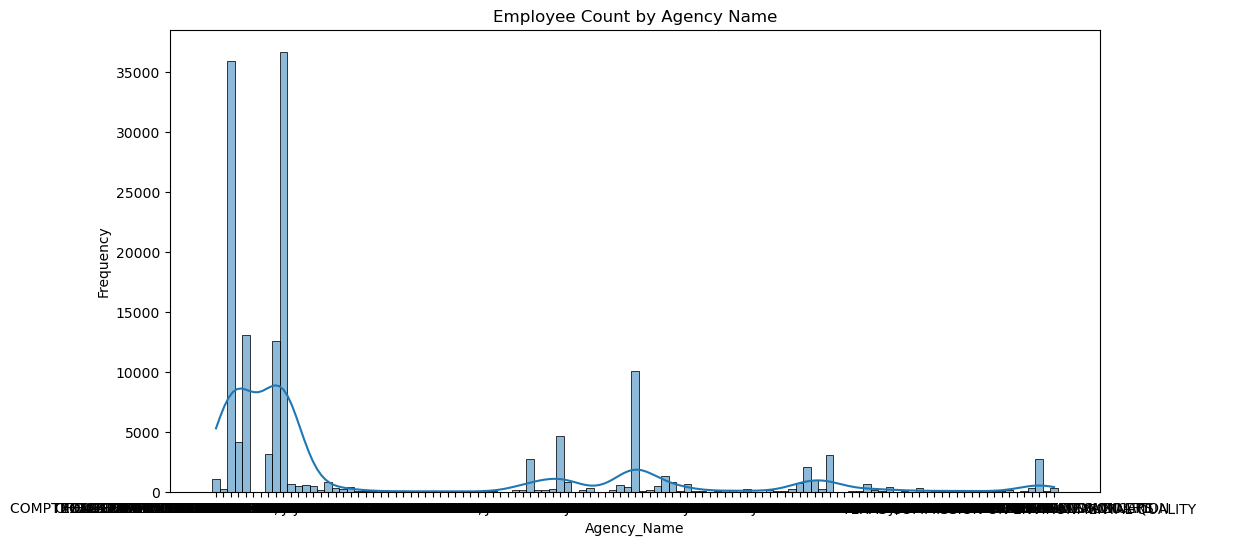

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(data=new_data, x='Agency_Name', palette='Set1',kde=True)
plt.title('Employee Count by Agency Name')
plt.ylabel('Frequency') 
plt.show()


## Insights:
- There is no much variations in Agency_Name 
- There is no Proper distribution

### Countplot of Ethnicity

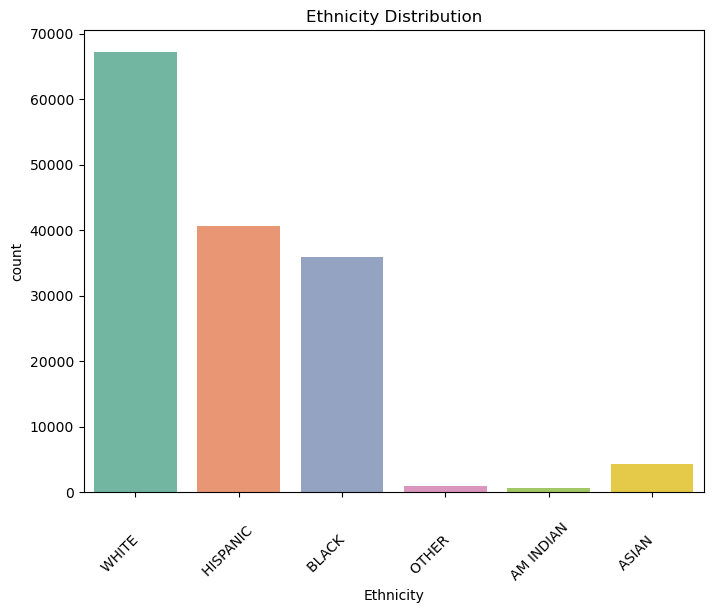

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Ethnicity', data=new_data, palette='Set2')
plt.title('Ethnicity Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


## Insights: 
- More employees belongs to White people
- Ethnicity has 6 different categories as shown in above graph

### Histplot of Class Title

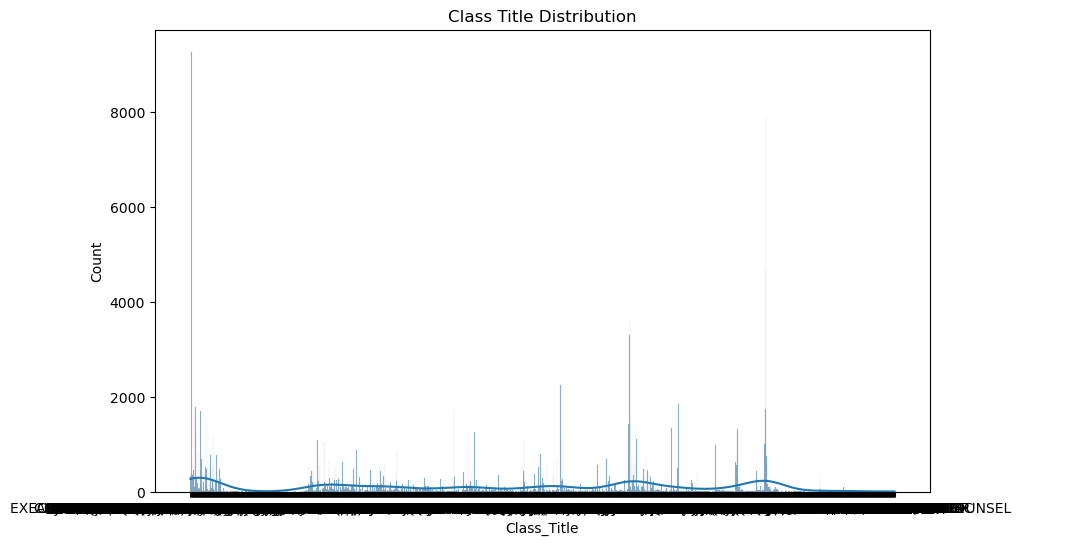

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Class_Title', data=new_data,kde=True,palette='coolwarm')
plt.title('Class Title Distribution')  # Rotate labels for better readability
plt.show()


## Insights:
-  There is no much variations in Class_Title(no proper distribution).
- As we cannot understand the graph clearly No proper distribution showing

### Histplot of Status

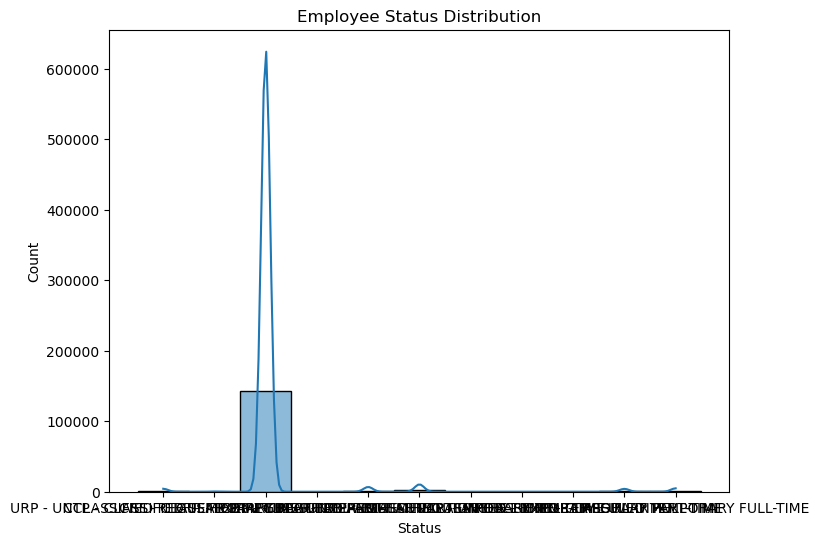

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Status', data=data,kde=True,palette='Set3')
plt.title('Employee Status Distribution')
plt.show()


## Insights:
- Status is having normal distribution
- The majority of an employees works in CLASSIFIED_REGULAR_FULL_TIME

### Countplot of Gender

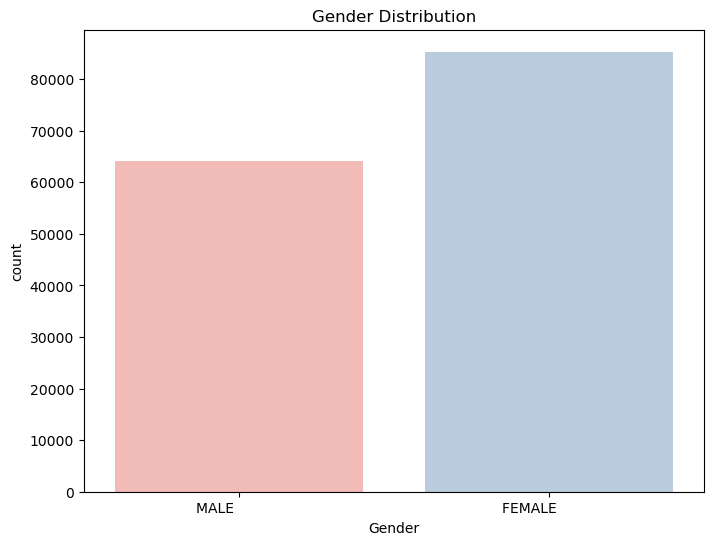

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=new_data, palette='Pastel1')
plt.title('Gender Distribution')
plt.show()


## Insights:
- as we can see that female count is higher than male

### Histplot for Hrly Rate

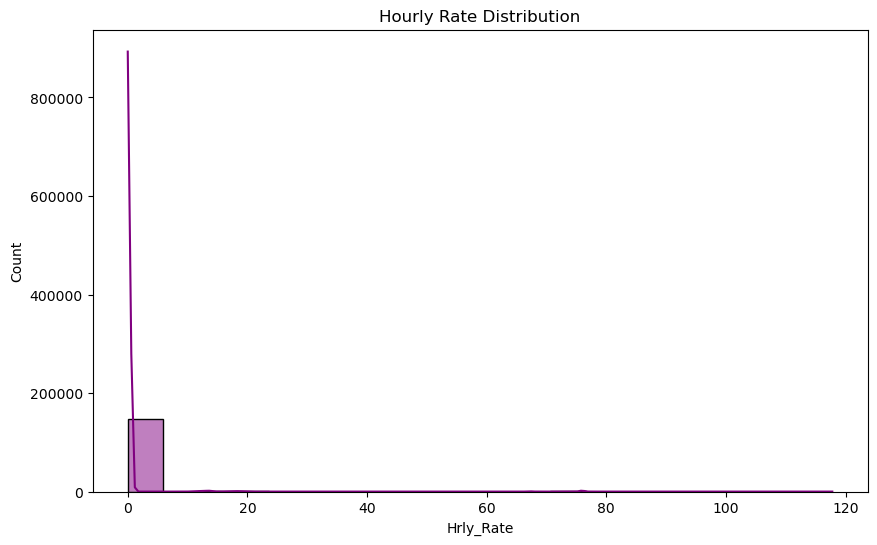

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Hrly_Rate'], kde=True, bins=20, color='purple')
plt.title('Hourly Rate Distribution')
plt.show()


## Insights:
- Hrly_Rate is having left skewed distribution
- The majority no.of employees work on a range of 0-8 dollars per hour.

### Histplot of Hrs Per Wk

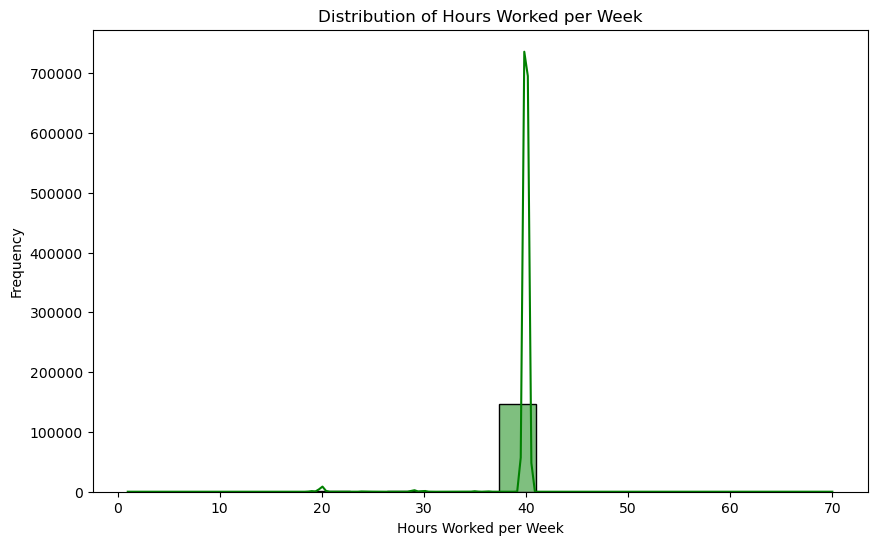

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(new_data['Hrs_Per_wk'], kde=True, color='green', palette='Greens')
plt.title('Distribution of Hours Worked per Week')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Frequency')
plt.show()


## Insights:
- hrs_Per_wk having normal distribution
- The majority no.of employees work on an average of 40 hours per week.

### Histplot for Monthly

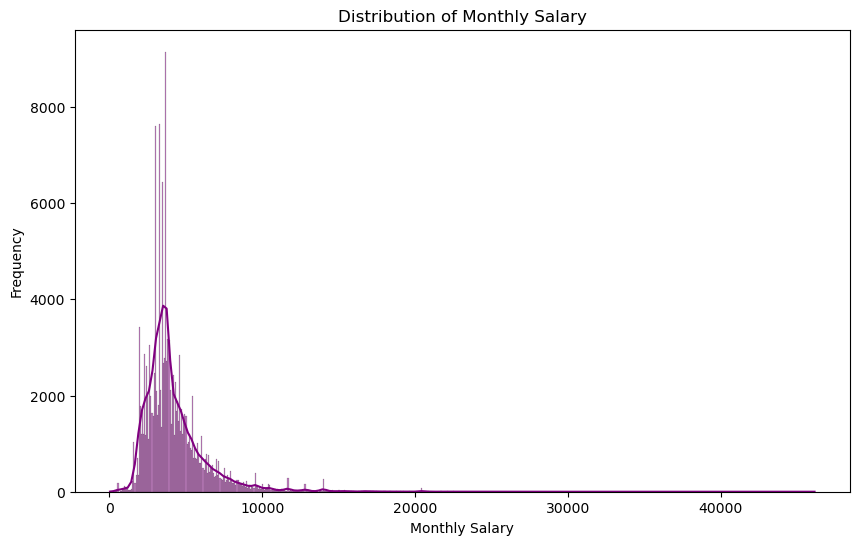

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(new_data['Monthly'], kde=True, color='purple', palette='Purples')
plt.title('Distribution of Monthly Salary')
plt.xlabel('Monthly Salary')
plt.ylabel('Frequency')
plt.show()


## Insights:
- Monthly is having right skewed distribution
- The majority of an employee is less than 10000 dollars per month

### Histplot for Annual

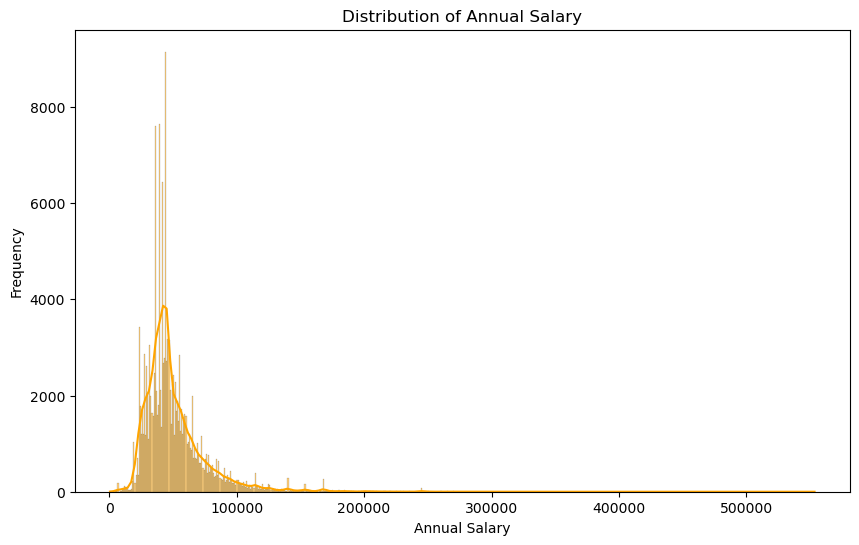

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(new_data['Annual'], kde=True, color='orange', palette='Oranges')
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()


## Insights:
- Annual is having right skewed distribution
- the majority of an employee is less than 100000 dollars per year

### Histplot for State Number

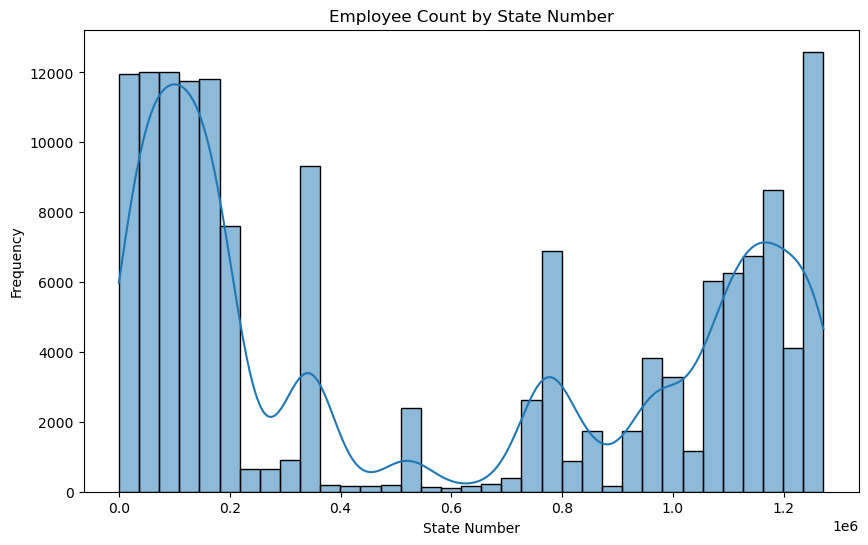

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(data=new_data, x='State_Number', palette='Set2',kde=True)  # You can change the palette to your preference
plt.title('Employee Count by State Number')
plt.xlabel('State Number')
plt.ylabel('Frequency')
plt.show()


## Insights:
-  'State_Number' displays the distribution of employees across different states.
-   The majority of employee working in HEALTH AND HUMAN SERVICES COMMISION that is about 36667 and TEXAS DEPARTMENT OF CRIMINAL JUSTICE is being in second place having 35926.

# Bavariate Analysis

#### It refres to plots between input variables and target variable

### Scatterplot Between Anuual and each input columns of dataset

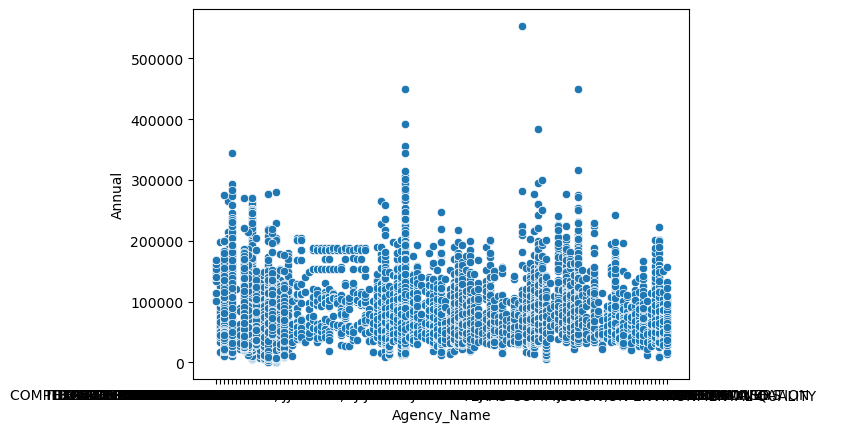

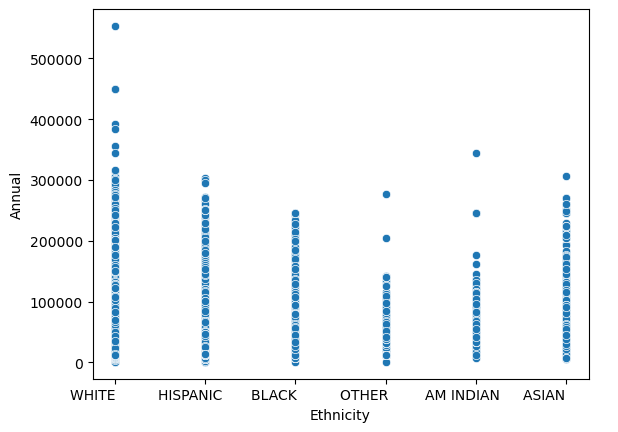

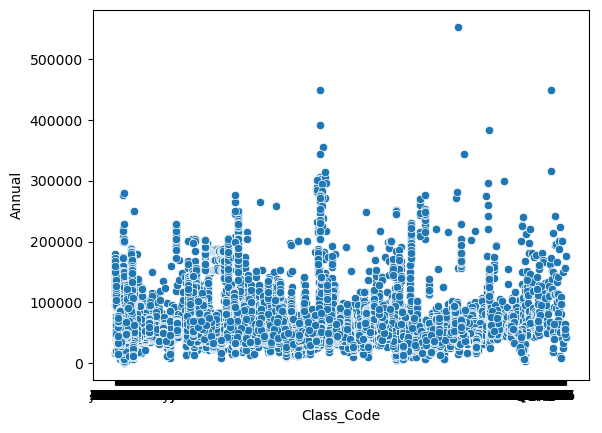

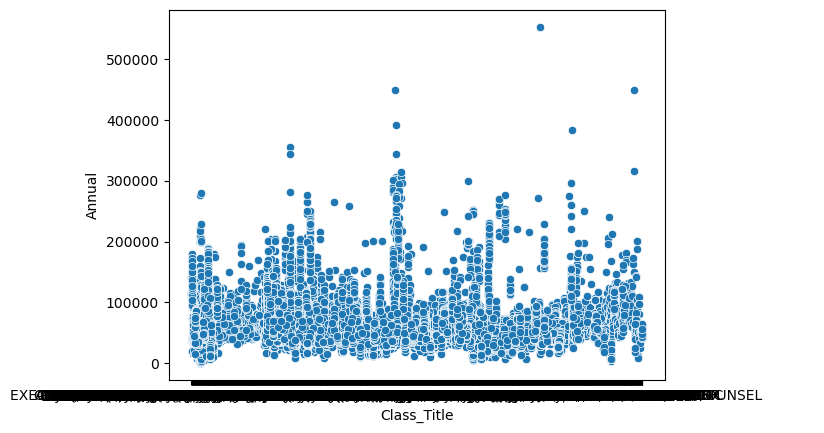

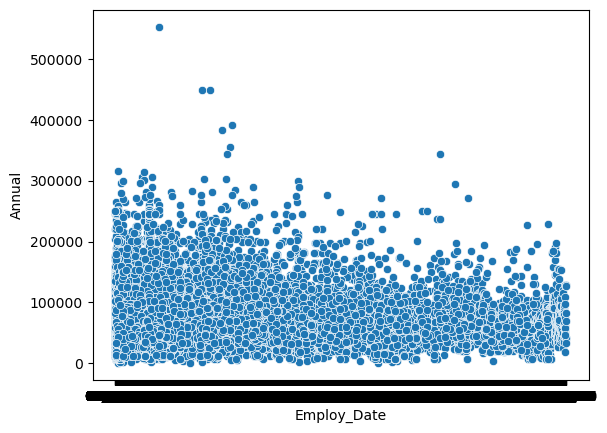

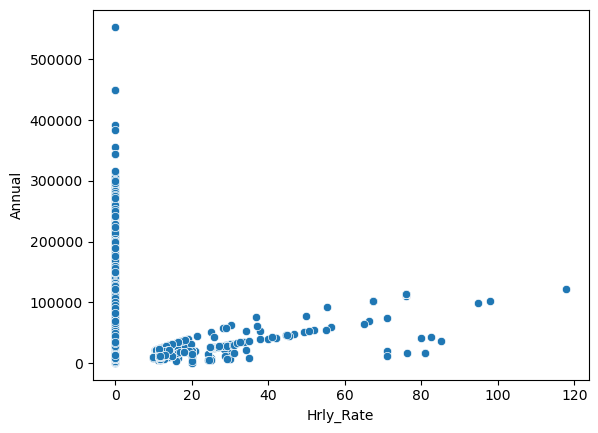

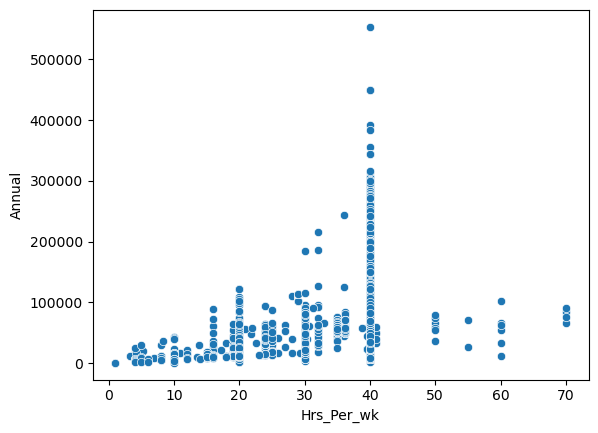

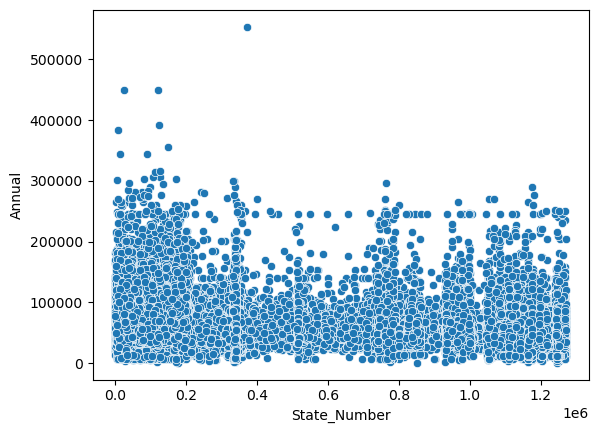

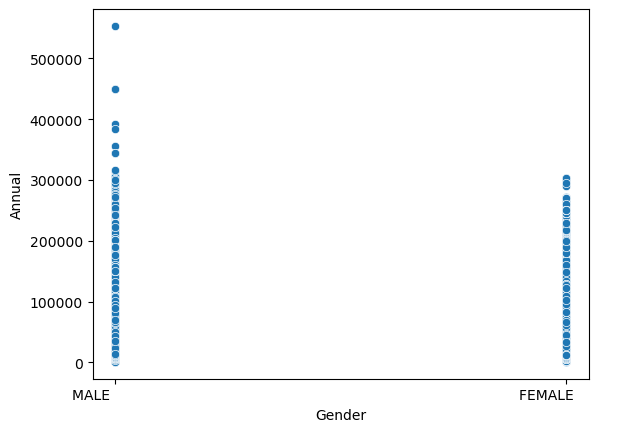

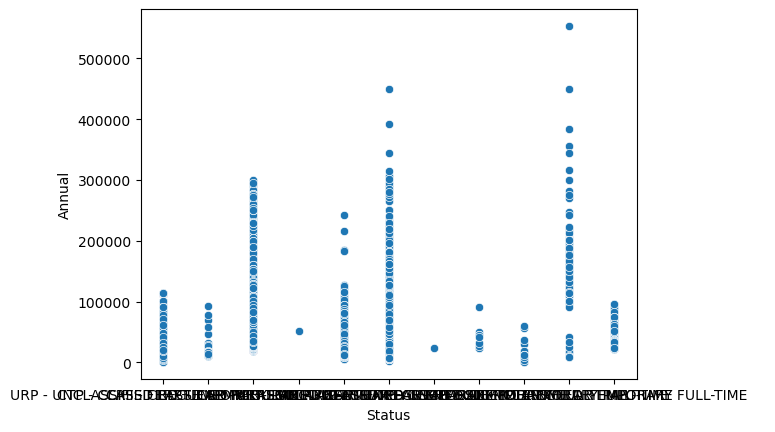

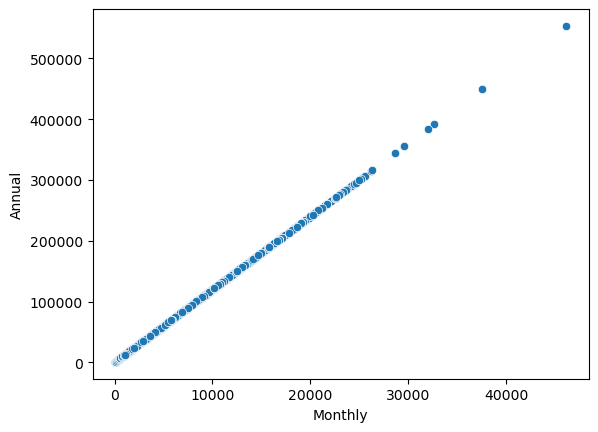

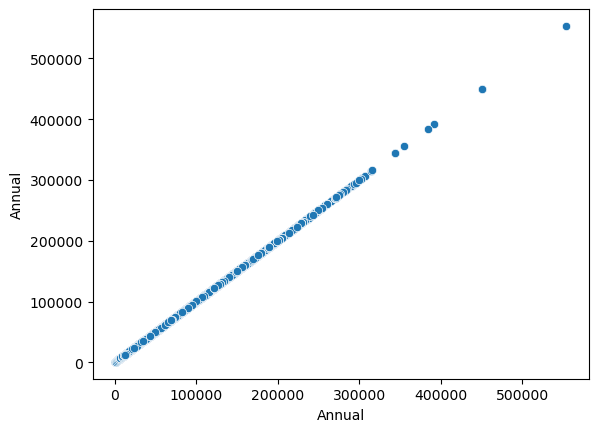

In [10]:
for columns in new_data:
    sns.scatterplot(x=columns,y=data.Annual,data=new_data)
    plt.show()

### Maximum Salary of Annual column

In [8]:
data.Annual.max()

553500.0

In [9]:
data.loc[data['Annual']==553500.0]

AGENCY                                        Agency_Name  \
83851     542  CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...   

                            LAST NAME                      FIRST NAME MI  \
83851  WILLSON                         JAMES                               

      Class_Code                                        Class_Title  \
83851   C542      CHIEF SCIENTIFIC OFFICER                      ...   

             Ethnicity           Gender  \
83851  WHITE            MALE              

                                         Status Employ_Date  Hrly_Rate  \
83851  ERF - EXEMPT REGULAR FULL-TIME              03/01/16        0.0   

       Hrs_Per_wk  Monthly    Annual  State_Number duplicated  \
83851        40.0  46125.0  553500.0        372291        NaN   

       multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
83851                      NaN                    NaN                   NaN   

      hide_from_search  
83851              NaN

In [10]:
data.loc[data['Annual']>400000]

AGENCY                                        Agency_Name  \
14793      323  TEACHER RETIREMENT SYSTEM                     ...   
83851      542  CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...   
144232     327  EMPLOYEES RETIREMENT SYSTEM                   ...   

                             LAST NAME                      FIRST NAME MI  \
14793   AUBY                            JASE                            R   
83851   WILLSON                         JAMES                               
144232  TULL                            CHARLES                         T   

       Class_Code                                        Class_Title  \
14793    C204      CHIEF INVESTMENT OFFICER                      ...   
83851    C542      CHIEF SCIENTIFIC OFFICER                      ...   
144232   D136      DIRECTOR OF INVESTMENTS                       ...   

              Ethnicity           Gender  \
14793   WHITE            MALE              
83851   WHITE            MALE              
144232  WHITE            MALE              

                                          Status Employ_Date  Hrly_Rate  \
14793   ERF - EXEMPT REGULAR FULL-TIME              11/09/09        0.0   
83851   ERF - EXEMPT REGULAR FULL-TIME              03/01/16        0.0   
144232  URF - UNCLASSIFIED REGULAR FULL-TIME        02/01/09        0.0   

        Hrs_Per_wk  Monthly    Annual  State_Number duplicated  \
14793         40.0  37500.0  450000.0        121522        NaN   
83851         40.0  46125.0  553500.0        372291        NaN   
144232        40.0  37500.0  450000.0         24680        NaN   

        multiple_full_time_jobs combined_multiple_jobs  summed_annual_salary  \
14793                       NaN                    NaN                   NaN   
83851                       NaN                    NaN                   NaN   
144232                      NaN                    NaN                   NaN   

       hide_from_search  
14793               NaN  
83851               NaN  
144232              NaN

## Insights:
- There is no trend between Agency_Name and Annual.
- There is no tred between Class_Code and Annual.
- There is no Tred between Class_Title and Anuual.
- There is no tred between Employee_Date and Annual
- The Agencies are paying less than 200000 dollars to their majority of employees per year.
- The Chief Scientific Officer is getting highest salary that is about 553500 dollars per Annum.
- In class_title majority of designation individual getting  less than 200000 dollars.
- Excluding White people others are getting less than 300000 dollars per annum.
- The highest salary paid to WHITE people is about 500000 dollars per annum.
- Male individual are getting more salary compared to Female individuals.
- The Maximum salaries are earned by UNCLASSIFIED REGULAR FULL-TIME and EXEMPT REGULAR FULL-TIME.
- The people who are working 30-40 hrs_per_week are getting higher salaried compared to others.
- HRLY_RATE AND MONTHLY is having linear with annual.
- The females are geting paid less than 3lakhs dollars.
- Only one employee of STATE_NUMBER(372291) has salary of above 5lakh dollars and majority of them have salary less than 3lakh dollars annually.

### Scatterplot Between Hrly Rate and Annual with Hue Gender

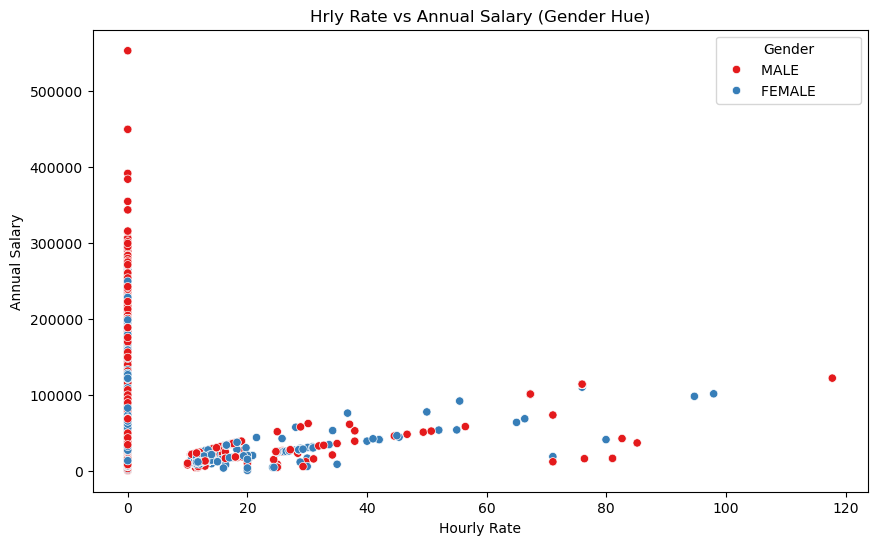

In [56]:
# Scatter plot with 'Hrly_Rate' vs 'Annual' and 'hue' for 'Gender'
plt.figure(figsize=(10,6))
sns.scatterplot(data=new_data, x='Hrly_Rate', y='Annual', hue='Gender', palette='Set1')
plt.title('Hrly Rate vs Annual Salary (Gender Hue)')
plt.xlabel('Hourly Rate')
plt.ylabel('Annual Salary')
plt.show()

## Insights:
- hourly rate showing positive relation with anuual salary.
- male employee getting high salry than female

### Scatter plot between Hrs Per Wk and annual with hue Status

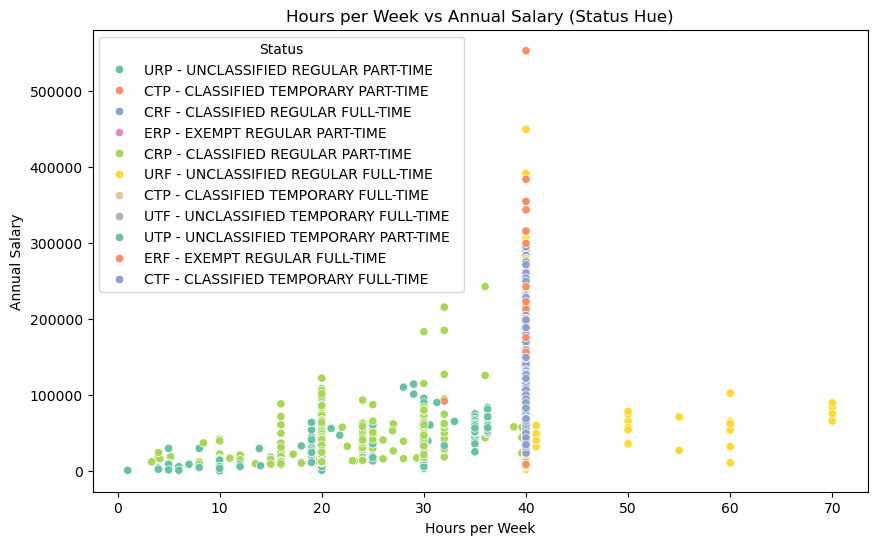

In [57]:
# Scatter plot with 'Hrs_Per_wk' vs 'Annual' and 'hue' for 'Status'
plt.figure(figsize=(10,6))
sns.scatterplot(data=new_data, x='Hrs_Per_wk', y='Annual', hue='Status', palette='Set2')
plt.title('Hours per Week vs Annual Salary (Status Hue)')
plt.xlabel('Hours per Week')
plt.ylabel('Annual Salary')
plt.show()


## Insights:
- The people who are working 30-40 hrs_per_week are getting higher salaried compared to others.
- The Maximum salaries are earned by UNCLASSIFIED REGULAR FULL-TIME and EXEMPT REGULAR FULL-TIME

# Multivariate Analysis

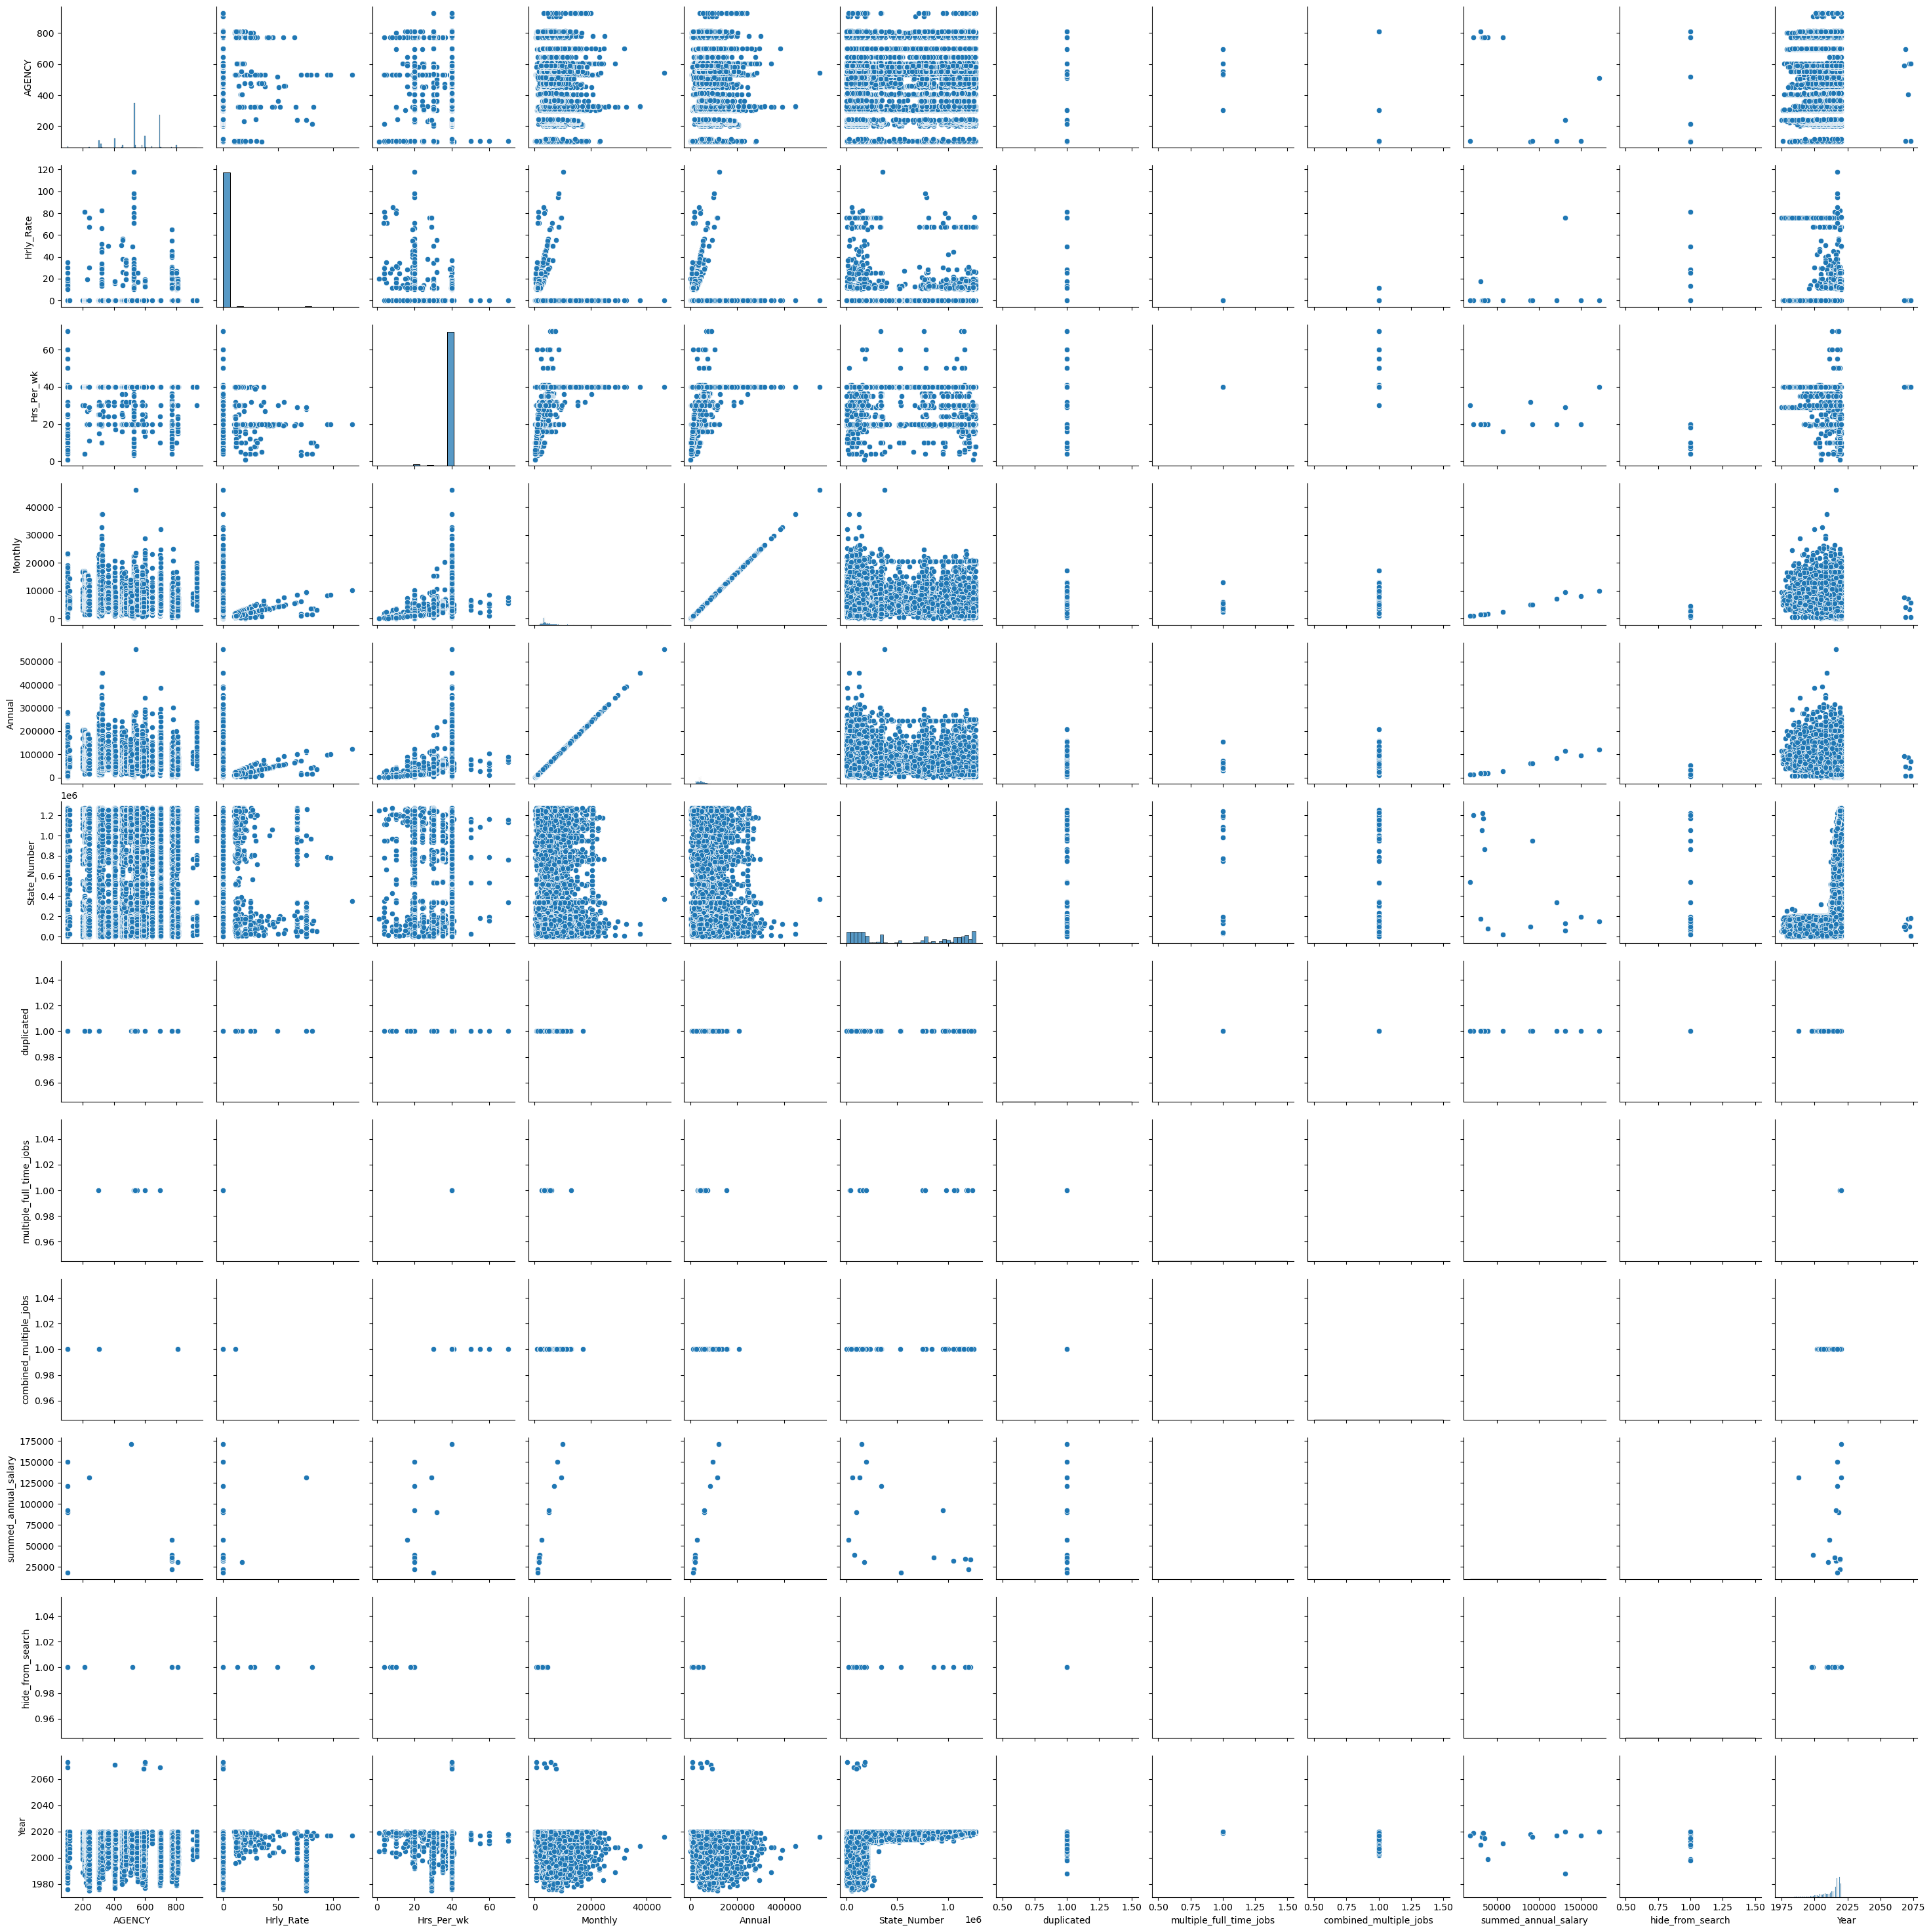

In [12]:
sns.pairplot(data)

## Insights:
- Hourly Rate may show positive correlations with Annual Salary that means hourly rate increases, annual salary tends to increase.
- Hourly Rate,State Number,Gender and Monthly Salary correlates with Annual Salary.
-  Hourly Rate are strongly correlated with Annual Salary
-  Gender and Status show weaker correlations
-  hourly rate might be more predictive of salary than gender or employment status.
-  Monthly and Annual columns are highly correlated with each other i.e 100% so we are dropping Monthly columns

# Feature Selection/ Engineering 

## Heatmap of Numerical Columns

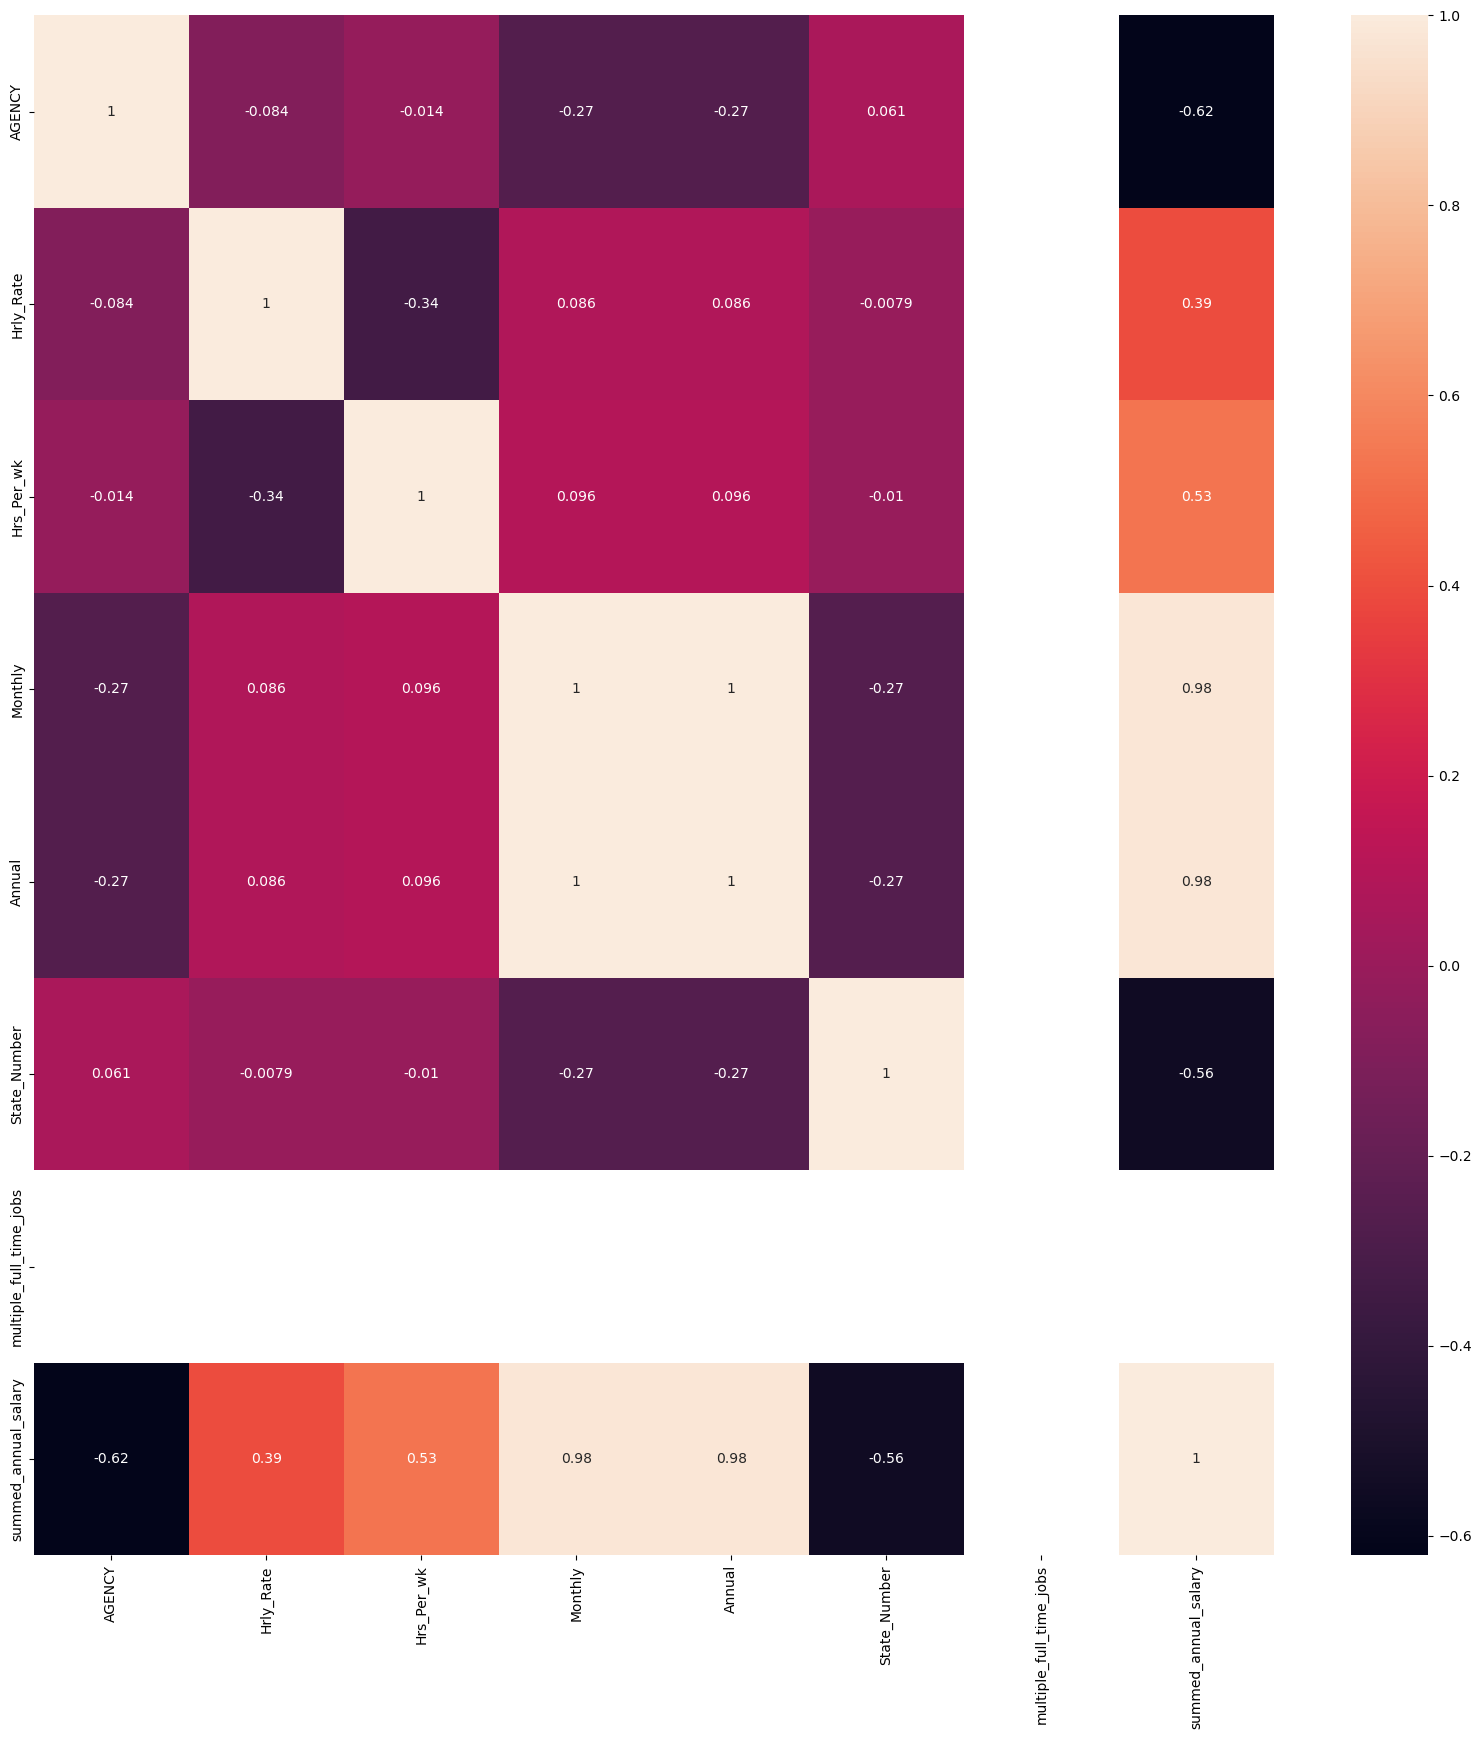

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Generate the correlation heatmap
plt.figure(figsize=(20, 20), facecolor='white')
sns.heatmap(data=numeric_data.corr(), annot=True)
plt.show()

## Insights:
- Monthly is having **0.98 **correlation with summed_annual_salary, so both columns - are highly co related with each other.

- Multiple_full_time_jobs is highly correlated with every other feature.

- MONTHLY and ANNUAL columns are highly correlated with each other i.e, 100% so we are dropping MONTHLY columns.

# Data Preprocessing and Feature Engineering

### Handling missing values

In [13]:
data.isnull().sum()

AGENCY                          0
Agency_Name                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
Class_Code                      0
Class_Title                     0
Ethnicity                       0
Gender                          0
Status                          0
Employ_Date                     0
Hrly_Rate                       0
Hrs_Per_wk                      0
Monthly                         0
Annual                          0
State_Number                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
Year                            0
dtype: int64

## Insights:
- As,last five columns have more than 95% of them are null values,we will ignore them
- For particular Agency code there is unique Agency_name so we are dropping Agency
- we are droping Last Name, First Name, Mi since there is no relation with target variable
- for particular Class_Title there is unique Class_Code so,we are dropping Class_Code.

In [29]:
data.columns

Index(['Agency_Name', 'Class_Title', 'Ethnicity', 'Gender', 'Status',
       'Employ_Date', 'Hrly_Rate', 'Hrs_Per_wk', 'Annual', 'State_Number',
       'Year', 'cur_yr', 'yrs'],
      dtype='object')

## Dropping Unwanted columns from datasets

In [9]:
data=data.drop(['AGENCY','LAST NAME','FIRST NAME','MI','Class_Code','duplicated','Monthly','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1)

In [10]:
data.head(2)

Agency_Name  \
0  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1  OFFICE OF COURT ADMINISTRATION                ...   

                                         Class_Title        Ethnicity  \
0  JUDGE, RETIRED                                ...  WHITE             
1  GENERAL COUNSEL IV                            ...  WHITE             

            Gender                                    Status Employ_Date  \
0  MALE             URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   
1  MALE             CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   

   Hrly_Rate  Hrs_Per_wk     Annual  State_Number  
0   75.96150        29.0  114549.84        127717  
1   81.04454         4.0   16857.24        127717

## Handling Employ_Date Column

In [11]:
# Converting object dtype date to datetime dtype
from datetime  import datetime as dt
data['Employ_Date']=pd.to_datetime(data['Employ_Date'])
# add a column for year
data['Year']=data['Employ_Date'].dt.year

In [12]:
# Fetching today's date and removing time stamp(converting time to zeros)
import datetime as dt
data['cur_yr']=dt.datetime.combine(dt.date.today(),dt.datetime.min.time())

In [13]:
data.head(2)

Agency_Name  \
0  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1  OFFICE OF COURT ADMINISTRATION                ...   

                                         Class_Title        Ethnicity  \
0  JUDGE, RETIRED                                ...  WHITE             
1  GENERAL COUNSEL IV                            ...  WHITE             

            Gender                                    Status Employ_Date  \
0  MALE             URP - UNCLASSIFIED REGULAR PART-TIME      1988-02-18   
1  MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      2015-02-01   

   Hrly_Rate  Hrs_Per_wk     Annual  State_Number  Year     cur_yr  
0   75.96150        29.0  114549.84        127717  1988 2025-01-12  
1   81.04454         4.0   16857.24        127717  2015 2025-01-12

### we are substracting current year with employ_date and applying it to lambda function to calculate years for each record

In [14]:
data['yrs']=((data.cur_yr)-(data.Employ_Date)).apply(lambda x: str(x).split(' ')[0]).apply(lambda x: int(x)/365)

In [15]:
data.head(2)

Agency_Name  \
0  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1  OFFICE OF COURT ADMINISTRATION                ...   

                                         Class_Title        Ethnicity  \
0  JUDGE, RETIRED                                ...  WHITE             
1  GENERAL COUNSEL IV                            ...  WHITE             

            Gender                                    Status Employ_Date  \
0  MALE             URP - UNCLASSIFIED REGULAR PART-TIME      1988-02-18   
1  MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      2015-02-01   

   Hrly_Rate  Hrs_Per_wk     Annual  State_Number  Year     cur_yr        yrs  
0   75.96150        29.0  114549.84        127717  1988 2025-01-12  36.926027  
1   81.04454         4.0   16857.24        127717  2015 2025-01-12   9.953425

### Finding Max num from yrs column

In [16]:
data.yrs.max()

49.4

### Finding Min num from yrs column

In [17]:
data.yrs.min()

-48.69315068493151

In [18]:
neg=data.loc[data['yrs']<0]
neg

Agency_Name  \
20904   DEPARTMENT OF PUBLIC SAFETY                   ...   
88771   TEXAS DEPARTMENT OF TRANSPORTATION            ...   
92736   TEXAS DEPARTMENT OF TRANSPORTATION            ...   
116978  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
141891  HOUSE OF REPRESENTATIVES                      ...   
142425  HOUSE OF REPRESENTATIVES                      ...   
148921  SOIL AND WATER CONSERVATION BOARD             ...   

                                              Class_Title        Ethnicity  \
20904   SERGEANT, DPS                                 ...  WHITE             
88771   ADMINISTRATIVE ASST II                        ...  WHITE             
92736   PROGRAM SPECIALIST III                        ...  WHITE             
116978  AGRICULTURE SPEC V                            ...  WHITE             
141891  ELECTED OFFICIAL                              ...  WHITE             
142425  ELECTED OFFICIAL                              ...  BLACK             
148921  PROGRAM SPECIALIST VII                        ...  WHITE             

                 Gender                                    Status Employ_Date  \
20904   MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2071-10-06   
88771   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2072-08-01   
92736   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        2073-09-10   
116978  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2069-07-14   
141891  MALE             URF - UNCLASSIFIED REGULAR FULL-TIME      2069-01-14   
142425  FEMALE           URF - UNCLASSIFIED REGULAR FULL-TIME      2073-01-09   
148921  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        2068-12-01   

        Hrly_Rate  Hrs_Per_wk    Annual  State_Number  Year     cur_yr  \
20904         0.0        40.0  86494.92        171968  2071 2025-01-12   
88771         0.0        40.0  40661.28        100209  2072 2025-01-12   
92736         0.0        40.0  68796.00        180353  2073 2025-01-12   
116978        0.0        40.0  48404.88         68427  2069 2025-01-12   
141891        0.0        40.0   7200.00        116511  2069 2025-01-12   
142425        0.0        40.0   7200.00          6963  2073 2025-01-12   
148921        0.0        40.0  91900.92         96871  2068 2025-01-12   

              yrs  
20904  -46.761644  
88771  -47.583562  
92736  -48.693151  
116978 -44.531507  
141891 -44.035616  
142425 -48.024658  
148921 -43.915068

In [19]:
## The joing date of employee is higher than the current date whih leads to negative years of experience so, we are dropping those 5 records
data.drop(neg.index,inplace=True)

In [20]:
data.shape

(149474, 13)

In [21]:
data.columns

Index(['Agency_Name', 'Class_Title', 'Ethnicity', 'Gender', 'Status',
       'Employ_Date', 'Hrly_Rate', 'Hrs_Per_wk', 'Annual', 'State_Number',
       'Year', 'cur_yr', 'yrs'],
      dtype='object')

## Dropping Employ Date, year and cur year column which are unwanted

In [22]:
data.drop(['Employ_Date','Year','cur_yr'],inplace=True,axis=1)

In [23]:
data

Agency_Name  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                                              Class_Title        Ethnicity  \
0       JUDGE, RETIRED                                ...  WHITE             
1       GENERAL COUNSEL IV                            ...  WHITE             
2       JUDGE, RETIRED                                ...  WHITE             
3       GENERAL COUNSEL IV                            ...  WHITE             
4       CORREC  OFFICER IV                            ...  HISPANIC          
...                                                   ...              ...   
149476  SECURITY OFFICER III                          ...  WHITE             
149477  WEB ADMINISTRATOR III                         ...  WHITE             
149478  CUSTOMER SERVICE REP I                        ...  WHITE             
149479  PROGRAM SPECIALIST III                        ...  WHITE             
149480  CUSTOMER SERVICE REP I                        ...  WHITE             

                 Gender                                    Status  Hrly_Rate  \
0       MALE             URP - UNCLASSIFIED REGULAR PART-TIME       75.96150   
1       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       81.04454   
2       MALE             URP - UNCLASSIFIED REGULAR PART-TIME       75.96150   
3       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       81.04453   
4       FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
...                 ...                                       ...        ...   
149476  MALE             CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
149477  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
149478  MALE             CRP - CLASSIFIED REGULAR PART-TIME         12.93000   
149479  MALE             CRF - CLASSIFIED REGULAR FULL-TIME          0.00000   
149480  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME         11.74000   

        Hrs_Per_wk     Annual  State_Number        yrs  
0             29.0  114549.84        127717  36.926027  
1              4.0   16857.24        127717   9.953425  
2             29.0  114549.84         59115   4.950685  
3              4.0   16857.24         59115   6.369863  
4             40.0   39411.24        165030   4.542466  
...            ...        ...           ...        ...  
149476        40.0   34788.00        770781   7.208219  
149477        40.0   66000.00        847431   9.509589  
149478        20.0   13447.20         34266  12.252055  
149479        40.0   68929.92        123490  35.331507  
149480        20.0   12209.52        103583  12.915068  

[149474 rows x 10 columns]

## Categorical Encoding -One Hot Encoding

In [22]:
import pandas as pd

In [23]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [24]:
data.select_dtypes(include='O')

Agency_Name  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                                              Class_Title        Ethnicity  \
0       JUDGE, RETIRED                                ...  WHITE             
1       GENERAL COUNSEL IV                            ...  WHITE             
2       JUDGE, RETIRED                                ...  WHITE             
3       GENERAL COUNSEL IV                            ...  WHITE             
4       CORREC  OFFICER IV                            ...  HISPANIC          
...                                                   ...              ...   
149476  SECURITY OFFICER III                          ...  WHITE             
149477  WEB ADMINISTRATOR III                         ...  WHITE             
149478  CUSTOMER SERVICE REP I                        ...  WHITE             
149479  PROGRAM SPECIALIST III                        ...  WHITE             
149480  CUSTOMER SERVICE REP I                        ...  WHITE             

                 Gender                                    Status  
0       MALE             URP - UNCLASSIFIED REGULAR PART-TIME      
1       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      
2       MALE             URP - UNCLASSIFIED REGULAR PART-TIME      
3       MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      
4       FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
...                 ...                                       ...  
149476  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
149477  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
149478  MALE             CRP - CLASSIFIED REGULAR PART-TIME        
149479  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
149480  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME        

[149474 rows x 5 columns]

In [33]:
data.Agency_Name.value_counts()

Agency_Name
HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35925
TEXAS DEPARTMENT OF TRANSPORTATION                    13097
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10096
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: count, Length: 113, dtype: int64

In [36]:
data.Class_Title.value_counts()

Class_Title
CORREC  OFFICER IV                                    9267
CORREC  OFFICER V                                     7895
CORREC OFFCR III                                      4718
TEXAS WORKS ADVISOR II                                3646
DIRECT SUPPORT PROFESSIONAL I                         3307
                                                      ... 
CHAIR,PARDONS AND PAROLES                                1
STATISTICIAN II                                          1
EX DIRECTOR TDCJ                                         1
PAYROLL SPECIALIST I                                     1
DEPUTY DIR/APPS MGR                                      1
Name: count, Length: 1422, dtype: int64

In [37]:
data.Ethnicity.value_counts()

Ethnicity
WHITE              67136
HISPANIC           40585
BLACK              35852
ASIAN               4268
OTHER                921
AM INDIAN            712
Name: count, dtype: int64

In [38]:
data.Status.value_counts()

Gender
FEMALE             85325
MALE               64149
Name: count, dtype: int64

In [39]:
data.Status.value_counts()

Status
CRF - CLASSIFIED REGULAR FULL-TIME          142497
URF - UNCLASSIFIED REGULAR FULL-TIME          2361
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
URP - UNCLASSIFIED REGULAR PART-TIME           950
ERF - EXEMPT REGULAR FULL-TIME                 923
CTP - CLASSIFIED TEMPORARY PART-TIME            81
UTP - UNCLASSIFIED TEMPORARY PART-TIME          21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          12
ERP - EXEMPT REGULAR PART-TIME                   1
CTP - CLASSIFIED TEMPORARY FULL-TIME             1
Name: count, dtype: int64

In [24]:
data=pd.get_dummies(data,drop_first=False)
data.head(3)

Hrly_Rate  Hrs_Per_wk     Annual  State_Number        yrs  \
0   75.96150        29.0  114549.84        127717  36.926027   
1   81.04454         4.0   16857.24        127717   9.953425   
2   75.96150        29.0  114549.84         59115   4.950685   

   Agency_Name_ALCOHOLIC BEVERAGE COMMISSION                       \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_BOARD OF ARCHITECTURAL EXAMINERS                    \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_BOARD OF CHIROPRACTIC EXAMINERS                     \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_BOARD OF DENTAL EXAMINERS                           \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_BOARD OF EXAMINERS OF PSYCHOLOGISTS                 \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_BOARD OF NURSE EXAMINERS                            \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_BOARD OF PHARMACY                                   \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_BOARD OF PLUMBING EXAMINERS                         \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_BOARD OF PROFESSIONAL GEOSCIENTISTS                 \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_BOARD OF PROFESSIONAL LAND SURVEYING                \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_BOARD OF PUBLIC ACCOUNTANCY                         \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_BOARD OF VETERINARY MEDICAL EXAMINERS               \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS   \
0                                              False                
1                                              False                
2                                              False                

   Agency_Name_COMMISSION ON JAIL STANDARDS                        \
0                                              False                
1      

- One-Hot Encoding creates a binary (0 or 1) column for each category level
- pd.get_dummies(data, drop_first=False) converts categorical columns in data into one-hot encoded columns, keeping all the categories.
- No category is dropped, meaning every unique value in a categorical feature will have its own binary column.

In [25]:
data.shape

(149474, 1559)

# Handling outliers:
- In a Texas Employee Salary Prediction dataset, checking and handling outliers might not be important
- The outliers represent valid data points (e.g., high salaries for senior staff or low salaries for part-time employees), and removing them would lead to a loss of valuable information

## Scaling 

Sacling the data is not required for the given dataset because we have only limited or very less variations in the feature columns.

# Task 2:-Create a predictive model which will help the Texas state government  team to know the payroll information of employees of the state of Texas.

## Creating features and label 

In [26]:
x=data.drop(['Annual'],axis=1)
y=data.Annual

In [27]:
x

Hrly_Rate  Hrs_Per_wk  State_Number        yrs  \
0        75.96150        29.0        127717  36.926027   
1        81.04454         4.0        127717   9.953425   
2        75.96150        29.0         59115   4.950685   
3        81.04453         4.0         59115   6.369863   
4         0.00000        40.0        165030   4.542466   
...           ...         ...           ...        ...   
149476    0.00000        40.0        770781   7.208219   
149477    0.00000        40.0        847431   9.509589   
149478   12.93000        20.0         34266  12.252055   
149479    0.00000        40.0        123490  35.331507   
149480   11.74000        20.0        103583  12.915068   

        Agency_Name_ALCOHOLIC BEVERAGE COMMISSION                       \
0                                                   False                
1                                                   False                
2                                                   False                
3                                                   False                
4                                                   False                
...                                                   ...                
149476                                              False                
149477                                              False                
149478                                              False                
149479                                              False                
149480                                              False                

        Agency_Name_BOARD OF ARCHITECTURAL EXAMINERS                    \
0                                                   False                
1                                                   False                
2                                                   False                
3                                                   False                
4                                                   False                
...                                                   ...                
149476                                              False                
149477                                              False                
149478                                              False                
149479                                              False                
149480                                              False                

        Agency_Name_BOARD OF CHIROPRACTIC EXAMINERS                     \
0                                                   False                
1                                                   False                
2                                                   False                
3                                                   False                
4                                                   False                
...                                                   ...                
149476                                              False                
149477                                              False                
149478                                              False                
149479                                              False                
149480                                              False                

        Agency_Name_BOARD OF DENTAL EXAMINERS                           \
0                                                   False                
1                                                   False                
2                                                   False                
3                                                   False                
4                                                   False                
...                                                   ...                
149476                                              False                
149477                                              

In [28]:
x.shape

(149474, 1558)

In [29]:
y.shape

(149474,)

## Splitting the data into training and testing

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [31]:
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (119579, 1558)
Testing set shape: (29895, 1558)


In [32]:
print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)

Training set shape: (119579,)
Testing set shape: (29895,)


## Model Creation

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [34]:
import math
train_pred=LR.predict(x_train)
r2_train=r2_score(y_train,train_pred)
print('R squared value:' ,r2_train)

test_pred=LR.predict(x_test)
r2_test=r2_score(y_test,test_pred)
print('R squred value:',r2_test)

mae_lr = mean_absolute_error(y_test, test_pred)
mse_lr = mean_squared_error(y_test, test_pred)
rmse_lr = math.sqrt(mse_lr)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")

R squared value: 0.9497806754395115
R squred value: 0.921725939564837
Mean Absolute Error (MAE): 3367.4862821789934
Mean Squared Error (MSE): 49272194.085657135
Root Mean Squared Error (RMSE): 7019.415508833847


- R-squared Value: The R-squared value on both the training data (0.9498) and testing data (0.9217) is quite high, indicating that the model explains a significant portion of the variance in the data. Higher R-squared values suggest that the model is performing well.
- this model's strong R-squared values and relatively low MAE, MSE, and RMSE suggest it is performing well, making linear regression a good choice for Texas Employee Salary Predictions.

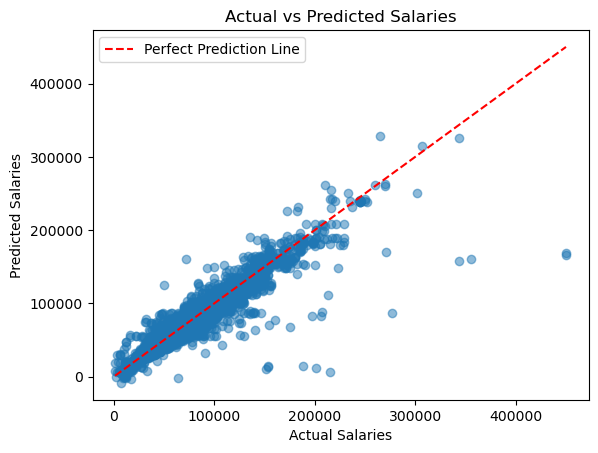

In [35]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, test_pred, alpha=0.5)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs Predicted Salaries")

# Add a diagonal separator line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Show the plot
plt.legend()
plt.show()


## Insights:
Since the red dashed line represents perfect predictions (where predicted salaries equal actual salaries), points that are close to this line suggest that the model's predictions are accurate.

# Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=44)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=44)

In [40]:
train_pred_dt=model.predict(x_train)
r2_train_dt=r2_score(y_train,train_pred_dt)
print('R squared value:' ,r2_train_dt)

test_pred_dt=model.predict(x_test)
r2_test_dt=r2_score(y_test,test_pred_dt)
print('R squred value:',r2_test_dt)

mae=mean_absolute_error(y_test,test_pred_dt)
mse=mean_squared_error(y_test,test_pred_dt)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

import math
print(math.sqrt(mean_squared_error(y_test,test_pred_dt)))

R squared value: 1.0
R squred value: 0.8174490471537705
Mean Absolute Error (MAE): 4467.4754119418285
Mean Squared Error (MSE): 114912730.0813998
10719.735541579363


# Random forest Regrssor

In [45]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=10,random_state=42)
RF.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [47]:
train_pred_RF=RF.predict(x_train)
r2_train_RF=r2_score(y_train,train_pred_RF)
print('R squared value:' ,r2_train_RF)

test_pred_RF=RF.predict(x_test)
r2_test_RF=r2_score(y_test,test_pred_RF)
print('R squred value:',r2_test_RF)

mae=mean_absolute_error(y_test,test_pred_RF)
mse=mean_squared_error(y_test,test_pred_RF)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

import math
print(math.sqrt(mean_squared_error(y_test,test_pred_RF))) 

R squared value: 0.9792340254189954
R squred value: 0.8716160966880684
Mean Absolute Error (MAE): 3822.126235775237
Mean Squared Error (MSE): 80815490.67841661
8989.743638080932


# Knn regressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [51]:
train_pred_knn=knn.predict(x_train)
r2_train_knn=r2_score(y_train,train_pred_knn)
print('R squared value:' ,r2_train_knn)

test_pred_knn=knn.predict(x_test)
r2_test_knn=r2_score(y_test,test_pred_knn)
print('R squred value:',r2_test_knn)

mae=mean_absolute_error(y_test,test_pred_knn)
mse=mean_squared_error(y_test,test_pred_knn)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

import math
print(math.sqrt(mean_squared_error(y_test,test_pred_knn)))

R squared value: 0.2565591007975935
R squred value: 0.0362971059639835
Mean Absolute Error (MAE): 16013.228236327144
Mean Squared Error (MSE): 606634634.4097537
24629.954007463224


### XGB Regressor

In [50]:
XG=XGBRegressor(random_state=42)
XG.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [52]:
train_pred_XG=XG.predict(x_train)
r2_train_XG=r2_score(y_train,train_pred_XG)
print('R squared value:' ,r2_train_XG)

test_pred_XG=XG.predict(x_test)
r2_test_XG=r2_score(y_test,test_pred_XG)
print('R squred value:',r2_test_XG)

mae=mean_absolute_error(y_test,test_pred_XG)
mse=mean_squared_error(y_test,test_pred_XG)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

import math
print(math.sqrt(mean_squared_error(y_test,test_pred_XG)))

R squared value: 0.855156491584391
R squred value: 0.8309963299076424
Mean Absolute Error (MAE): 6460.572789689696
Mean Squared Error (MSE): 106384945.2511371
10314.307793116177


### Gradient Boosting

In [53]:
GB=GradientBoostingRegressor(max_depth=4,random_state=42)
GB.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, random_state=42)

In [54]:
train_pred_GB=GB.predict(x_train)
r2_train_GB=r2_score(y_train,train_pred_GB)
print('R squared value:' ,r2_train_GB)

test_pred_GB=GB.predict(x_test)
r2_test_GB=r2_score(y_test,test_pred_GB)
print('R squred value:',r2_test_GB)

mae=mean_absolute_error(y_test,test_pred_GB)
mse=mean_squared_error(y_test,test_pred_GB)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

import math
print(math.sqrt(mean_squared_error(y_test,test_pred_GB))) 

R squared value: 0.6630956768757374
R squred value: 0.6468953832388835
Mean Absolute Error (MAE): 10007.10281572647
Mean Squared Error (MSE): 222273370.16720688
14908.835305522925


### Create a DataFrame for Training And testing model comparison

In [36]:
# Create a DataFrame for model comparison
models_comparison = {
    "Model": ["Linear Regression","Decision Tree Regressor","Random Forest Regressor",
              "Gradient Boosting Regressor",'K-Nearest Neighbors (KNN) Regressor Model',"XGBoost",],
    "Train R2 Score": [0.949, 1.0, 0.974, 0.663,0.855,0.256],
    "Test R2 Score": [ 0.921, 0.817, 0.860, 0.646,0.830,0.036]
}

# Convert dictionary to a DataFrame
metrics_df = pd.DataFrame(models_comparison)

# Display the table
metrics_df

Model  Train R2 Score  Test R2 Score
0                          Linear Regression           0.949          0.921
1                    Decision Tree Regressor           1.000          0.817
2                    Random Forest Regressor           0.974          0.860
3                Gradient Boosting Regressor           0.663          0.646
4  K-Nearest Neighbors (KNN) Regressor Model           0.855          0.830
5                                    XGBoost           0.256          0.036

### From Above chart Insights : 
- Linear Regression has R-squared Value: The R-squared value on both the training data (0.9498) and testing data (0.9217) is quite high, indicating that the model explains a significant portion of the variance in the data. Higher R-squared values suggest that the model is performing well.
- Decision Tree Regressor Model has The perfect R² on the training set (1.0) combined with a lower R² on the test set (0.82) suggests overfitting. This means the model has memorized the training data rather than learning the general patterns
- Random Forest The model explains 97.4% of the variance in the training data, indicating that the model fits the training data very well but the model explains 87% of the variance in the test data which seems that overfitting.
- Gradient Boosting Regressor The model explains 66.31% of the variance in the training data. and The model explains 64.69% of the variance in the test data.which seems generalizaed but very less R2 score. This indicates that the model fits the training data moderately well but doesn't capture all patterns perfectly.
- XGBoost has The drop from 0.8552 (training) to 0.8310 (test) is relatively small it has best r2 score as compared to linear regression its less.
- K-Nearest Neighbors (KNR) This model has very low R² values on both the training (0.257) and test (0.036) sets, indicating that it doesn't explain much of the variance in the data and is underfitting the model.

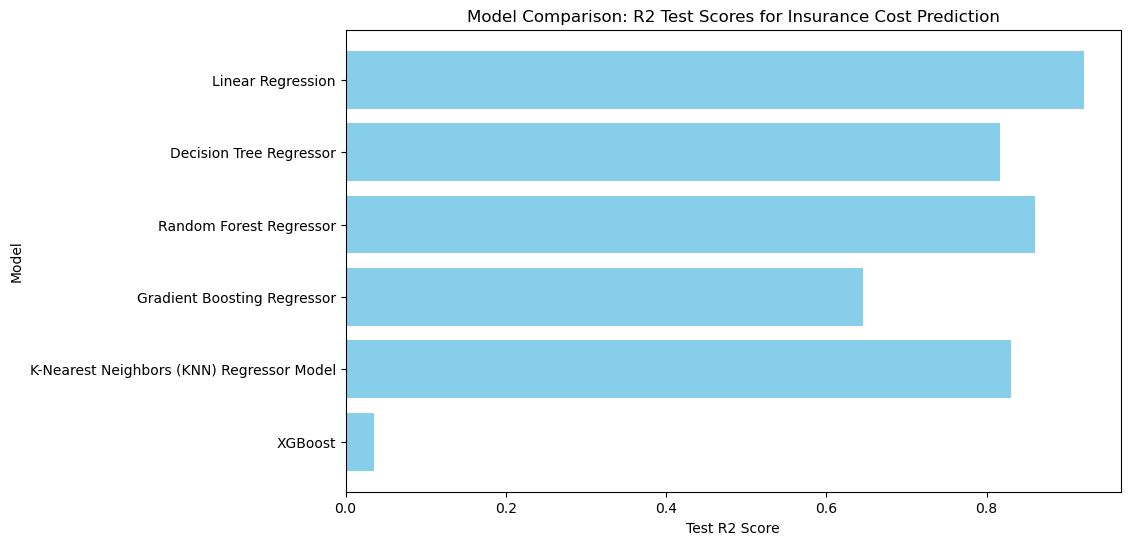

In [37]:
import matplotlib.pyplot as plt

# Plot R2 Test Scores
plt.figure(figsize=(10, 6))
plt.barh(metrics_df["Model"], metrics_df["Test R2 Score"], color="skyblue")
plt.xlabel("Test R2 Score")
plt.ylabel("Model")
plt.title("Model Comparison: R2 Test Scores for Insurance Cost Prediction")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

## Insights
- The table and visualization will clearly show which model performed the best based on the R2 Test Score.
- this is selecting the best-performing model( Linear Regression).

## Deployment: Save and Load the Model

In [38]:
import pickle

filename = 'Texas_Employee_Salary_Prediction_Model.pkl'

# Save the model to a file
with open(filename, 'wb') as f:
    pickle.dump(LR, f)
print("Model saved successfully!")

Model saved successfully!


## Loading the Model:

In [43]:
# Load the saved model
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions
predictions = loaded_model.predict(x_test)
print(predictions)


[36181.65209525 46022.54288405 48720.04104382 ... 28226.46257807
 45206.84083906 45770.25811011]


# ##Task 3:-
### 1. Who` are the outliers in the salaries?

## DataFrame **df** contains the

In [55]:
data=pd.read_csv('salary.csv')

In [56]:
data.head(3)

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       

   ... HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  duplicated  \
0  ...  75.96150        29.0  9545.82  114549.84        127717        True   
1  ...  81.04454         4.0  1404.77   16857.24        127717        True   
2  ...  75.96150        29.0  9545.82  114549.84         59115        True   

  multiple_full_time_jobs  combined_multiple_jobs summed_annual_salary  \
0                     NaN                     NaN            131407.08   
1                     NaN                     NaN                  NaN   
2                     NaN                     NaN            131407.08   

   hide_from_search  
0               NaN  
1              True  
2               NaN  

[3 rows x 21 columns]

<Axes: xlabel='ANNUAL'>

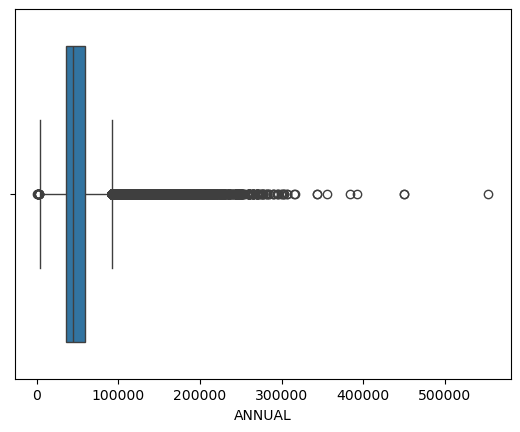

In [57]:
sns.boxplot(x='ANNUAL',data=data)

In [59]:
Q1=data.ANNUAL.quantile(0.25)
Q3=data.ANNUAL.quantile(0.75)
print(Q1)
Q3

36238.08


58389.72

In [60]:
IQR=Q3-Q1
print(IQR)

22151.64


In [61]:
low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR
print(low_limit)
upp_limit

3010.6200000000026


91617.18

In [63]:
lower=data.loc[data['ANNUAL']<low_limit]
lower

AGENCY                                        AGENCY NAME  \
141394     101  SENATE                                        ...   
141415     101  SENATE                                        ...   
141808     102  HOUSE OF REPRESENTATIVES                      ...   
141809     102  HOUSE OF REPRESENTATIVES                      ...   
141897     102  HOUSE OF REPRESENTATIVES                      ...   
141901     102  HOUSE OF REPRESENTATIVES                      ...   
142033     102  HOUSE OF REPRESENTATIVES                      ...   
142067     102  HOUSE OF REPRESENTATIVES                      ...   
142114     102  HOUSE OF REPRESENTATIVES                      ...   
142205     102  HOUSE OF REPRESENTATIVES                      ...   
142282     102  HOUSE OF REPRESENTATIVES                      ...   
142311     102  HOUSE OF REPRESENTATIVES                      ...   
142316     102  HOUSE OF REPRESENTATIVES                      ...   

                             LAST NAME                      FIRST NAME MI  \
141394  EDMONDSON                       DOUGLAS                             
141415  FONTENOT                        RACHEAL                         D   
141808  BERNAL                          JESUS                           R   
141809  BHALLA                          RACHEL                          C   
141897  CRUZ JR                         PHILLIP                             
141901  CUTBIRTH                        JOE                             H   
142033  HARRIS                          KATHARINE                       T   
142067  HOUSTON                         DONTE                           D   
142114  KOENIG                          REID                            A   
142205  MITCHELL                        JESSICA                         B   
142282  PETERSON                        BREELY                          K   
142311  REID                            MASON                           H   
142316  REYES                           IRMA                            M   

       CLASS CODE                                        CLASS TITLE  \
141394   7103      LEG. SERVICE/MAINTENANCE                      ...   
141415   7103      LEG. SERVICE/MAINTENANCE                      ...   
141808   7110      ELECTED OFFICIALS STAFF                       ...   
141809   7110      ELECTED OFFICIALS STAFF                       ...   
141897   7110      ELECTED OFFICIALS STAFF                       ...   
141901   7110      ELECTED OFFICIALS STAFF                       ...   
142033   7110      ELECTED OFFICIALS STAFF                       ...   
142067   7110      ELECTED OFFICIALS STAFF                       ...   
142114   7110      ELECTED OFFICIALS STAFF                       ...   
142205   7110      ELECTED OFFICIALS STAFF                       ...   
142282   7110      ELECTED OFFICIALS STAFF                       ...   
142311   7110      ELECTED OFFICIALS STAFF                       ...   
142316   7110      ELECTED OFFICIALS STAFF                       ...   

              ETHNICITY           GENDER  \
141394  WHITE            MALE              
141415  OTHER            FEMALE            
141808  HISPANIC         MALE              
141809  WHITE            FEMALE            
141897  HISPANIC         MALE              
141901  WHITE            MALE              
142033  WHITE            FEMALE            
142067  BLACK            MALE              
142114  WHITE            MALE              
142205  WHITE            FEMALE            
142282  WHITE            FEMALE            
142311  WHITE            MALE              
142316  HISPANIC         FEMALE            

                                          STATUS  ... HRLY RATE  HRS PER WK  \
141394  UTP - UNCLASSIFIED TEMPORARY PART-TIME    ...      20.0         1.0   
141415  UTP - UNCLASSIFIED TEMPORARY PART-TIME    ...      20.0         1.0   
141808  URP - UNCLASSIFIED REGULAR PART-TIME      ...       0.0        10.0   
141809  URP - UNCLAS

In [64]:
upper=data.loc[data['ANNUAL']>upp_limit]
upper

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
5          302  OFFICE OF THE ATTORNEY GENERAL                ...   
7          510  TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL     ...   
36         101  SENATE                                        ...   
...        ...                                                ...   
149374     809  STATE PRESERVATION BOARD                      ...   
149393     809  STATE PRESERVATION BOARD                      ...   
149401     809  STATE PRESERVATION BOARD                      ...   
149415     809  STATE PRESERVATION BOARD                      ...   
149475     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
5       ROGERS                          SHAUNA                              
7       SPINKS                          DARREL                          D   
36      BARNETT                         ANNA                            P   
...                                ...                             ... ..   
149374  KOCH                            MARGARET                        M   
149393  MEDINA                          JOE                                 
149401  NUNN                            CHRISTOPHER                     L   
149415  PROVINE                         CYNTHIA                         R   
149475  WELSH                           RODERICK                        N   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
2        JD25      JUDGE, RETIRED                                ...   
5        1623      DIRECTOR IV                                   ...   
7        1623      DIRECTOR IV                                   ...   
36       7101      LEG. OFFICIAL/ADMINISTRATOR                   ...   
...           ...                                                ...   
149374   1623      DIRECTOR IV                                   ...   
149393   1603      MGR IV                                        ...   
149401   1602      MGR III                                       ...   
149415   1622      DIRECTOR III                                  ...   
149475   E096      EXECUTIVE DIRECTOR                            ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
2       WHITE            MALE              
5       HISPANIC         FEMALE            
7       WHITE            MALE              
36      WHITE            FEMALE            
...                 ...              ...   
149374  WHITE            FEMALE            
149393  HISPANIC         MALE              
149401  BLACK            MALE              
149415  WHITE            FEMALE            
149475  WHITE            MALE              

                                          STATUS  ... HRLY RATE  HRS PER WK  \
0       URP - UNCLASSIFIED REGULAR PART-TIME      ...   75.9615        29.0   
2       URP - UNCLASSIFIED REGULAR PART-TIME      ...   75.9615        29.0   
5       CRF - CLASSIFIED REGULAR FULL-TIME        ...    0.0000        40.0   
7       CRF - CLASSIFIED REGULAR FULL-TIME        ...    0.0000        40.0   
36      URF - UNCLASSIFIED REGULAR FULL-TIME      ...    0.0000        40.0   
...                                          ...  ...       ...         ...   
149374  CRF - CLASSIFIED REGULAR FULL-TIME        ...    0.0000        40.0   
149393  CRF - CLASSIFIED REGULAR FULL-TIME        ...    0.0000        40.0   
149401  CRF - CLASSIFIED REGULAR FULL-TIME        ...    0.0000        40.0   
149415  CRF - CLASSIFIED REGULAR FULL-TIME        ...    0.0000       

In [65]:
df=pd.concat([lower,upper])
df

AGENCY                                        AGENCY NAME  \
141394     101  SENATE                                        ...   
141415     101  SENATE                                        ...   
141808     102  HOUSE OF REPRESENTATIVES                      ...   
141809     102  HOUSE OF REPRESENTATIVES                      ...   
141897     102  HOUSE OF REPRESENTATIVES                      ...   
...        ...                                                ...   
149374     809  STATE PRESERVATION BOARD                      ...   
149393     809  STATE PRESERVATION BOARD                      ...   
149401     809  STATE PRESERVATION BOARD                      ...   
149415     809  STATE PRESERVATION BOARD                      ...   
149475     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
141394  EDMONDSON                       DOUGLAS                             
141415  FONTENOT                        RACHEAL                         D   
141808  BERNAL                          JESUS                           R   
141809  BHALLA                          RACHEL                          C   
141897  CRUZ JR                         PHILLIP                             
...                                ...                             ... ..   
149374  KOCH                            MARGARET                        M   
149393  MEDINA                          JOE                                 
149401  NUNN                            CHRISTOPHER                     L   
149415  PROVINE                         CYNTHIA                         R   
149475  WELSH                           RODERICK                        N   

       CLASS CODE                                        CLASS TITLE  \
141394   7103      LEG. SERVICE/MAINTENANCE                      ...   
141415   7103      LEG. SERVICE/MAINTENANCE                      ...   
141808   7110      ELECTED OFFICIALS STAFF                       ...   
141809   7110      ELECTED OFFICIALS STAFF                       ...   
141897   7110      ELECTED OFFICIALS STAFF                       ...   
...           ...                                                ...   
149374   1623      DIRECTOR IV                                   ...   
149393   1603      MGR IV                                        ...   
149401   1602      MGR III                                       ...   
149415   1622      DIRECTOR III                                  ...   
149475   E096      EXECUTIVE DIRECTOR                            ...   

              ETHNICITY           GENDER  \
141394  WHITE            MALE              
141415  OTHER            FEMALE            
141808  HISPANIC         MALE              
141809  WHITE            FEMALE            
141897  HISPANIC         MALE              
...                 ...              ...   
149374  WHITE            FEMALE            
149393  HISPANIC         MALE              
149401  BLACK            MALE              
149415  WHITE            FEMALE            
149475  WHITE            MALE              

                                          STATUS  ... HRLY RATE  HRS PER WK  \
141394  UTP - UNCLASSIFIED TEMPORARY PART-TIME    ...      20.0         1.0   
141415  UTP - UNCLASSIFIED TEMPORARY PART-TIME    ...      20.0         1.0   
141808  URP - UNCLASSIFIED REGULAR PART-TIME      ...       0.0        10.0   
141809  URP - UNCLASSIFIED REGULAR PART-TIME      ...       0.0        10.0   
141897  URP - UNCLASSIFIED REGULAR PART-TIME      ...       0.0        20.0   
...                                          ...  ...       ...         ...   
149374  CRF - CLASSIFIED REGULAR FULL-TIME        ...       0.0        40.0   
149393  CRF - CLASSIFIED REGULAR FULL-TIME        ...       0.0        40.0   
149401  CRF - CLASSIFIED REGULAR FULL-TIME        ...       0.0        40.0   
149415  CRF - CLASSIFIED REGULAR FULL-TIME        ...       0.0       

## 2. What departments/roles have the biggest wage disparities between managers and employees?

#### CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS department is paying highest salary of $553500.0 to CHIEF SCIENTIFIC OFFICER.

#### HOUSE OF REPRESENTATIVES department is paying lowest salary of $600.0 to ELECTED OFFICIALS STAFF.

In [66]:
data

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  ... HRLY RATE  HRS PER WK  \
0       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
1       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04454         4.0   
2       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
3       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04453         4.0   
4       CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
...                                          ...  ...       ...         ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149477  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149478  CRP - CLASSIFIED REGULAR PART-TIME        ...  12.93000        20.0   
149479  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000       

In [69]:
data[['AGENCY NAME','ANNUAL']]

AGENCY NAME     ANNUAL
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...  114549.84
1       OFFICE OF COURT ADMINISTRATION                ...   16857.24
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...  114549.84
3       OFFICE OF COURT ADMINISTRATION                ...   16857.24
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   39411.24
...                                                   ...        ...
149476  STATE PRESERVATION BOARD                      ...   34788.00
149477  STATE PRESERVATION BOARD                      ...   66000.00
149478  STATE PRESERVATION BOARD                      ...   13447.20
149479  STATE PRESERVATION BOARD                      ...   68929.92
149480  STATE PRESERVATION BOARD                      ...   12209.52

[149481 rows x 2 columns]

In [70]:
data['AGENCY NAME'].value_counts()

AGENCY NAME
HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: count, Length: 113, dtype: int64

In [71]:
data.ANNUAL.max()

553500.0

In [72]:
data.ANNUAL.min()

600.0

In [73]:
data.loc[data['ANNUAL']==553500.0]

AGENCY                                        AGENCY NAME  \
83851     542  CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...   

                            LAST NAME                      FIRST NAME MI  \
83851  WILLSON                         JAMES                               

      CLASS CODE                                        CLASS TITLE  \
83851   C542      CHIEF SCIENTIFIC OFFICER                      ...   

             ETHNICITY           GENDER  \
83851  WHITE            MALE              

                                         STATUS  ... HRLY RATE  HRS PER WK  \
83851  ERF - EXEMPT REGULAR FULL-TIME            ...       0.0        40.0   

       MONTHLY    ANNUAL  STATE NUMBER  duplicated multiple_full_time_jobs  \
83851  46125.0  553500.0        372291         NaN                     NaN   

       combined_multiple_jobs summed_annual_salary  hide_from_search  
83851                     NaN                  NaN               NaN  

[1 rows x 21 columns]

In [74]:
data.loc[data['ANNUAL']==600.0]

AGENCY                                        AGENCY NAME  \
142067     102  HOUSE OF REPRESENTATIVES                      ...   

                             LAST NAME                      FIRST NAME MI  \
142067  HOUSTON                         DONTE                           D   

       CLASS CODE                                        CLASS TITLE  \
142067   7110      ELECTED OFFICIALS STAFF                       ...   

              ETHNICITY           GENDER  \
142067  BLACK            MALE              

                                          STATUS  ... HRLY RATE  HRS PER WK  \
142067  URP - UNCLASSIFIED REGULAR PART-TIME      ...       0.0        10.0   

        MONTHLY  ANNUAL  STATE NUMBER  duplicated multiple_full_time_jobs  \
142067     50.0   600.0        851628         NaN                     NaN   

        combined_multiple_jobs summed_annual_salary  hide_from_search  
142067                     NaN                  NaN               NaN  

[1 rows x 21 columns]

## 3. Have salaries and total compensations for some roles/ departments/ head-count changed over time?
#### Yes, for few CLASS TITLE with respect to AGENCY NAME, the salaries have changed over a period of time, however for few salaries haven't changed.

In [75]:
data.head()

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3     212  OFFICE OF COURT ADMINISTRATION                ...   
4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

   ... HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  duplicated  \
0  ...  75.96150        29.0  9545.82  114549.84        127717        True   
1  ...  81.04454         4.0  1404.77   16857.24        127717        True   
2  ...  75.96150        29.0  9545.82  114549.84         59115        True   
3  ...  81.04453         4.0  1404.77   16857.24         59115        True   
4  ...   0.00000        40.0  3284.27   39411.24        165030        True   

  multiple_full_time_jobs  combined_multiple_jobs summed_annual_salary  \
0                     NaN                     NaN            131407.08   
1                     NaN                     NaN                  NaN   
2                     NaN                     NaN            131407.08   
3                     NaN                     NaN                  NaN   
4                     1.0                     NaN                  NaN   

   hide_from_search  
0               NaN  
1              True  
2               NaN  
3              True  
4               NaN  

[5 rows x 21 columns]

In [77]:
data[['summed_annual_salary','ANNUAL']]

summed_annual_salary     ANNUAL
0                  131407.08  114549.84
1                        NaN   16857.24
2                  131407.08  114549.84
3                        NaN   16857.24
4                        NaN   39411.24
...                      ...        ...
149476                   NaN   34788.00
149477                   NaN   66000.00
149478                   NaN   13447.20
149479                   NaN   68929.92
149480                   NaN   12209.52

[149481 rows x 2 columns]

In [76]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [78]:
data3=data[['AGENCY NAME','CLASS TITLE','ANNUAL','EMPLOY DATE']]
data3

AGENCY NAME  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                                              CLASS TITLE     ANNUAL  \
0       JUDGE, RETIRED                                ...  114549.84   
1       GENERAL COUNSEL IV                            ...   16857.24   
2       JUDGE, RETIRED                                ...  114549.84   
3       GENERAL COUNSEL IV                            ...   16857.24   
4       CORREC  OFFICER IV                            ...   39411.24   
...                                                   ...        ...   
149476  SECURITY OFFICER III                          ...   34788.00   
149477  WEB ADMINISTRATOR III                         ...   66000.00   
149478  CUSTOMER SERVICE REP I                        ...   13447.20   
149479  PROGRAM SPECIALIST III                        ...   68929.92   
149480  CUSTOMER SERVICE REP I                        ...   12209.52   

       EMPLOY DATE  
0         02/18/88  
1         02/01/15  
2         02/01/20  
3         09/01/18  
4         06/29/20  
...            ...  
149476    10/30/17  
149477    07/13/15  
149478    10/15/12  
149479    09/22/89  
149480    02/16/12  

[149481 rows x 4 columns]

In [79]:
gkk=data3.groupby(['AGENCY NAME','CLASS TITLE','EMPLOY DATE'])
c=gkk.first()
c

ANNUAL
AGENCY NAME                                        CLASS TITLE                                        EMPLOY DATE          
ALCOHOLIC BEVERAGE COMMISSION                      ACCOUNTANT I                                       04/01/15     39790.56
                                                                                                      05/01/19     39000.00
                                                                                                      12/02/19     39000.00
                                                   ACCOUNTANT II                                      10/26/15     42500.04
                                                   ACCOUNTANT IV                                      04/01/15     48240.00
...                                                                                                                     ...
WATER DEVELOPMENT BOARD                            SYSTEMS ANALYST VI                                 01/20/88     96603.48
                                                   SYSTEMS SUPPORT SPECIALIST II                      09/01/19     48000.00
                                                   SYSTEMS SUPPORT SPECIALIST III                     11/11/19     52722.36
                                                   WEB ADMINISTRATOR III                              09/28/09     72381.12
                                                   WEB ADMINISTRATOR V                                11/13/00     87178.08

[77110 rows x 1 columns]

In [80]:
pd.set_option('display.max_rows',None)

In [4]:
data

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  ... HRLY RATE  HRS PER WK  \
0       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
1       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04454         4.0   
2       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
3       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04453         4.0   
4       CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
...                                          ...  ...       ...         ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149477  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149478  CRP - CLASSIFIED REGULAR PART-TIME        ...  12.93000        20.0   
149479  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000       

# Project Report: Texas Employee Salary Prediction:

## 1.Introduction:

The Texas Employee Salary Prediction dataset contains information on various employee attributes, including personal details, employment status, and salary-related data. The columns include details such as the employee's agency, job title, ethnicity, gender, employment status, hourly rate, hours worked per week, monthly and annual salary, and various flags related to job positions (e.g., multiple jobs, combined salary). The dataset is used to predict employee salaries based on factors like job title, hours worked, and employment status, providing insights into salary trends and workforce characteristics within Texas state agencies. It can be used for analysis, modeling, or predictive tasks related to employee compensation.

## 2.Dataset Overview

#### The dataset we used Texas employee Salary Prediction which includes the following features

1.AGENCY: A business or organization providing a particular serivice on behalf of another business,person,or group.
 - 2.AGENCY NAME: A person or thing through which power is used or something is achieved in this dataset Agency names are given
- 3.LAST NAME: It is the last name of indivisual/employee record.
- 4.FIRST NAME: It is the first name of indivisual/employee record.
- 5.MI: Middle intial is given 
- 6.CLASS CODE: These codes must be establised before employees can be added to the system and payrolls processed.
- 7.CLASS TITLE: The official title used for all personnel and payroll processes.
- 8.ETHNICITY: The quality or fact of belonging to a population group or subgroup made up of people. Here Ethnicity has 6 unique categories White,HISPANIC,BLACK,  ASIAN, OTHER,AM INDIAN,etc. 
- 9.GENDER: 
Is the range of characteristicsRelated to being female or male and recognizing the differences between them.h
- 10.STATUS : Position or rank in relation to others.
- 11.EMPLOYEE DATE : Date of joining of an individua/employeel.
- 12..HRLY RATE : The amount of money that is charged, paid, or earned for every hour worked.
- 13.HRS PER WEEK : The number of hours in a week that the employee normally would work for the shared work employer or 40 hours.
- 14.MONTHLY : A salary is the money that someone is paid each month by their employer.
- 15.ANNUAL : An annual salary is the total amount of money you earn from a job in a year.
- 16.STATE NUMBER : A unique number assigned to a business or organization by the state where the business operates, and is used for filing taxes and hiring employees.
- 17.DUPLICATED : One of two or more identical things.
- 18.MUTIPLE FULL TIME JOBS : Individuals works on one or more jobs in full time.
- 19.COMBINED MULTIPLE JOBS : The Combine Jobs feature allows you to merge two or more jobs from the same market view into a single job.
- 20.SUMMED ANNUAL SALARY : Total salary earned by an individual in a year including mutiple full time jobs and combined multiple jobs.
- 21.HIDE FROM SEARCH : Gives you the option for your web searches to be hidden with respect to organisatio.

### 3. Problem Understanding
The Texas Employee Salary Prediction problem involves predicting the salaries of employees based on various factors such as job title, hours worked, ethnicity, gender, and employment status. The goal is to build a model that accurately predicts annual salaries from available features, enabling insights into salary trends and workforce characteristics across Texas state agencies. This can aid in budget planning, policy-making, and understanding compensation patterns.

## Report on Challenges Faced
- In this project, we faced several challenges while working with the data and building predictive models. Here’s a detailed report of the challenges.

### Data Preprocessing

### Missing or Null Values

- While working on this dataset,In Basic checks was to see if there were any missing or null values in the data. Missing values can negatively impact the performance of machine learning models.

- this dataset had no missing values. If there were any, techniques like imputing missing values using the mean/median for numerical columns or the mode for categorical columns would have been applied.

### Handled Duplicate Data and Checked Data curruption

The dataset was thoroughly checked for duplicates and data corruption, and no duplicates were found

### Extracting the number of experience years from the EMPLOY_DATE column.
Extracting the number of experience years from the EMPLOY_DATE column posed a challenge due to inconsistent date formats. Accurately calculating the tenure required standardizing the dates and handling gaps in employment history, ensuring the derived experience years were reliable for analysis.

### Performing EDA (Explorarory Data Analysis)

- In this dataset we Analyse numerical and catagorial column using various plots and chekcs relation between two features. Also we Analysed Using univariate , Bivariate and multivariate by plotting the graphs and also we mentioned each insights below the graphs.

### Outliers Handling

- In a Texas Employee Salary Prediction dataset, checking and handling outliers might not be important
- The outliers represent valid data points (e.g., high salaries for senior staff or low salaries for part-time employees), and removing them would lead to a loss of valuable information

### Converting Categorical Data

The dataset included categories like Agency_Name,Class_Title,Ethnicity,Gender and Status which machines can't understand directly. So we converted these catagories into numerical using encoding technique. We used One Hot Encoding

## Challenges in Feature Selection

- We analyzed the relationships between features using a heatmap. This helped us understand which features were most important for Prediction. which are unwanted
- from heatmap we analyzed that below.
- Monthly is having **0.98 **correlation with summed_annual_salary, so both columns - are highly co related with each other.
- 
Multiple_full_time_jobs is highly correlated with every other feature- 

MONTHLY and ANNUAL columns are highly correlated with each other i.e, 100% so we are dropping MONTHLY columns.

## Scaling:
Sacling the data is not required for the given dataset because we have only limited or very less variations in the feature columns.

## Model Selection
- We tried different machine learning models for this regression problem:

##### The linear regression model is considered the best model for performance based on the following metrics:
- R-squared Value: The R-squared value on both the training data (0.9498) and testing data (0.9217) is quite high, indicating that the model explains a significant portion of the variance in the data. Higher R-squared values suggest that the model is performing well.
- this model's strong R-squared values and relatively low MAE, MSE, and RMSE suggest it is performing well, making linear regression a good choice for Texas Employee Salary Predictions.

## Model Deployment

Once the model was trained and evaluated, we saved the model using pickle. This allows us to load the model and make predictions on new, unseen data without retraining the model each time.

# Conclusion

- By comparing various regression machine learning models,we found that Linear Regression model is best suited for Texas Salary Prediction Dataset
- This dataset offers a wealth of information that can be used for various analytical and predictive tasks related to employee salary predictions. It is possible to generate meaningful insights into factors that influence salaries, identify potential salary disparities, and build models to predict compensation based on job classification, experience, and demographics. Proper handling of potential data quality issues, such as duplicates and privacy flags, is crucial to ensure accurate and ethical analysis

## Thank You